<a href="https://colab.research.google.com/github/skdixodnr/my_study/blob/main/20230509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05/09

# 회귀 분석
  - Gradient Descent

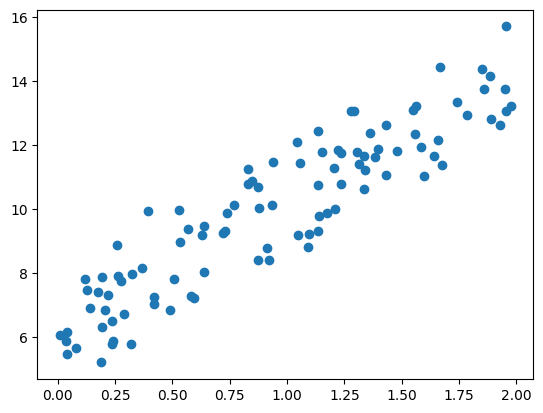

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y=4X+6식을 근사(w1=4,w=0.6). random. 값은 noise를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

# X,y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

In [ ]:
# w1과 w0를 업데이트 할 w1_update를 반환.
def get_weight_updates(w1, w0, X,y,learning_rate=0.01):
  N=len(y) # y = w_0+w1*x1
  #먼저 w1_update,w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1) # 벡터크기에 따라서 0 mapping시켜줘.
  w0_update = np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산.
  y_pred = np.dot(X,w1.T) +w0 # np.matmul써도 되지만 ,어차피 벡터 계산이기 때문에 dot를 씀
  #y = ax +b -> np.dot(X,w1.T)
  diff = y-y_pred # error function = (실제값 - 예측값)

  #w0_update를 dot 행렬 연산으로 구가히 위해 모두 1값을 가진 행렬 생성.
  w0_factors = np.ones((N,1)) # 초기값 ones로 셋팅 N크기만큼 받아들이고,

  # w1 과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff)) # error ftn : mse(mean square error)
  #/summation_i^n (y-y_hat)(-x_i)
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # summation_i^n (y-y_hat)(-x_1)

  return w1_update, w0_update #W_0,W_1 update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
  #w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1,w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0, X,y, learning_rate=0.01)
    #learning_rate -> hyperparameter(사람이 정하는 파라미터, 정해져 있지 않음.)
    # 보통 10^(-2) ~ 10^(-6) 절대적으로 정해져 있진 않음.
    w1 = w1-w1_update # w1(왼쪽에 있는) ->new , w1(오른쪽에 있는) ->old
    #w1_update = gradient descent 방법
    #new = old-update(update=0 -> new=old) # 최적의 값을 찾음.
    w0 = w0-w0_update
  return w1,w0

In [ ]:
def get_cost(y, y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  print(cost)
  return cost

In [ ]:
w1,w0 = gradient_descent_steps(X,y,iters=10000) # 10000번을 반복
#최적의 값을 뽑고 그때의 cost값을 출력
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968 w0:6.222
0.9924386487246484
Gradient Descent Total cost:0.9924


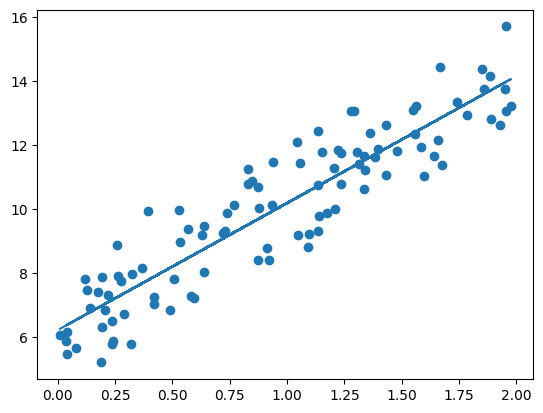

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)


## Sklearn 데이터셋 활용

**Bulid-in dataset**


- load_boston: 보스톤 집값 데이터
- load_iris: 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digits: 손글씨 데이터
- load_linnerud: multi-output regression 용 데이터
- load_wine: 와인 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터

### Sklearn Linear Regression Tutorial with Boston House Dataset

- Boston house dataset은 1.0부터 사라짐. 버전 downgrade가 필요.

In [ ]:
# !pip ununstall scikit-learn
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import numpy as np
import pandas as pd
# Visualization Libraries
import seaborn as sns
#seaborn : 그래프를 통계적으로 그리는 패키지.
import matplotlib.pyplot as plt
# import package
# -> 함수를 몽땅 가지고 오는 것.
# from package import module
# 패키지안에서 특정함수를 딸랑만 가지고 오는것.
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# from sklearn. -> .은 속성으로 들어가주세요!~
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
#To plot the graph embedded in the note book
%matplotlib inline

In [ ]:
boston = datasets.load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [ ]:
print(type(boston))
print('\n') # 엔터쳐주세요.
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n') # 엔터키를 치시오. print('\t') -> tab으로 띄어주세요. 
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
bos =pd.DataFrame(boston.data, columns = boston.feature_names)
# 행과 열을 접근하기 위해서
bos['PRICE'] = boston.target
print(bos.head()) #위에서 ()면, 갯수가 보임. default=다섯개
print(bos.tail()) #밑에서 다섯개

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3

In [ ]:
bos.isnull().sum()
#bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [ ]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


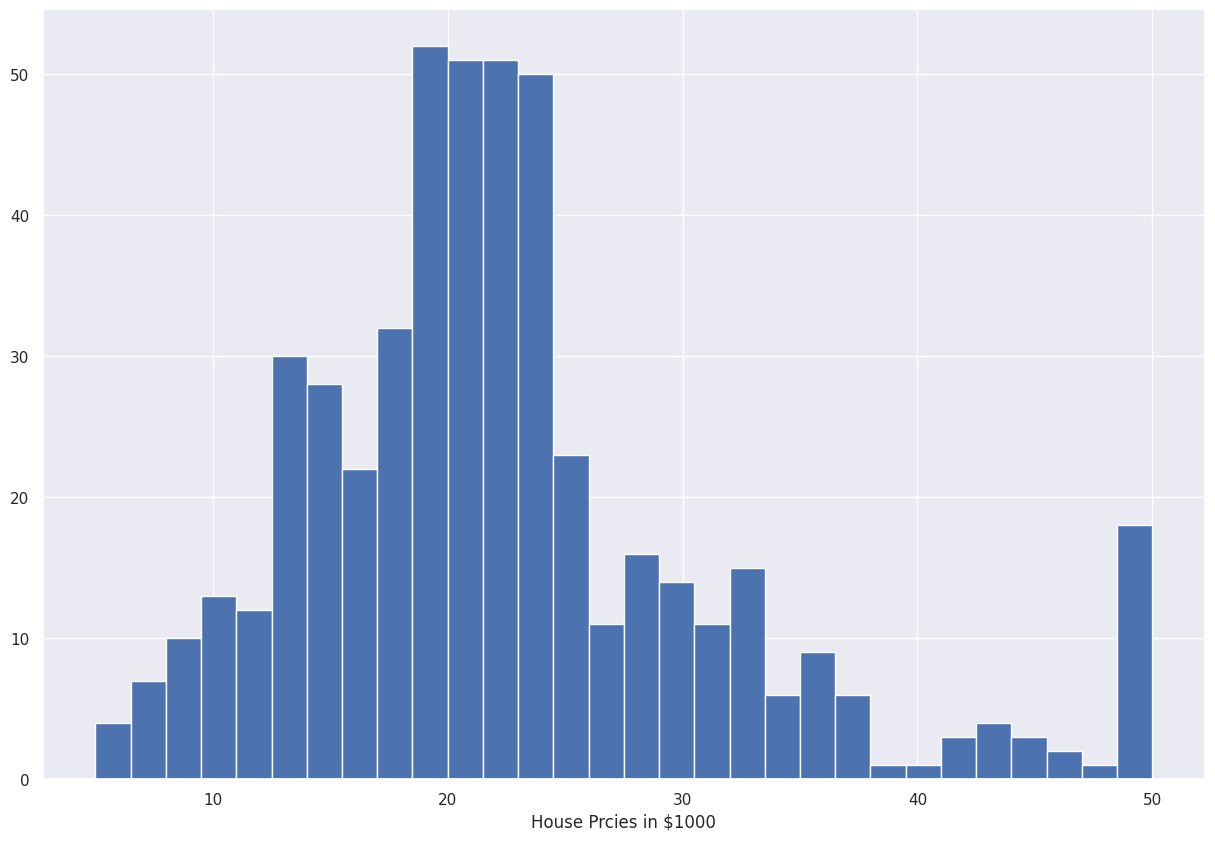

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize' : (15,10)}) #Price에 대해 그림을 그림.
#figure.figsize : 크기를 어떻게 할꺼냐?
plt.hist(bos['PRICE'],bins=30) # .hist -> 히스토그램을 하겠다. bins -> 막대가 몇 개냐?
plt.xlabel('House Prcies in $1000') # x축
plt.show() # 그림을 그리시오.

<Axes: >

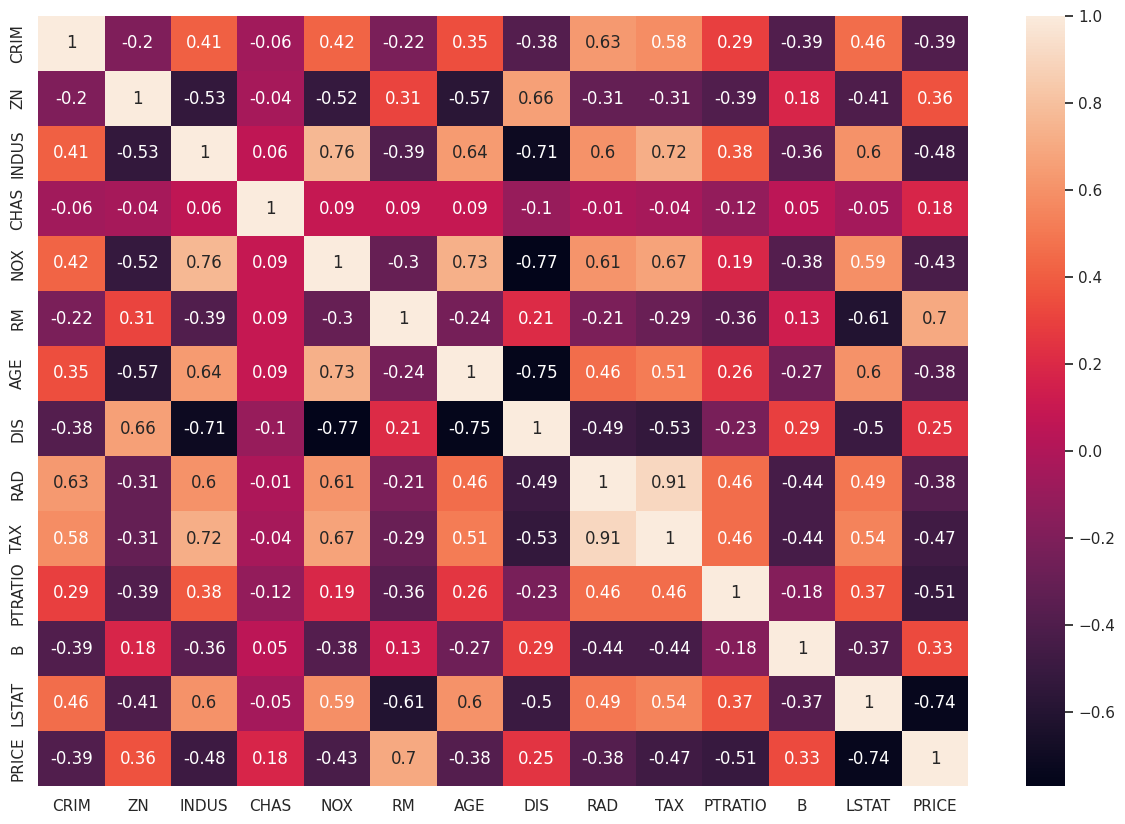

In [ ]:
correlation_matrix = bos.corr().round(2) # 상관계수를 계산해줘
sns.heatmap(data=correlation_matrix, annot=True)
#heatmap 관계가 높다는 검은색, 밝은색 -> 진한 색깔이면 관계가 높다.
#annot - > 계산한 값을 그림에 그려줘.

In [ ]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

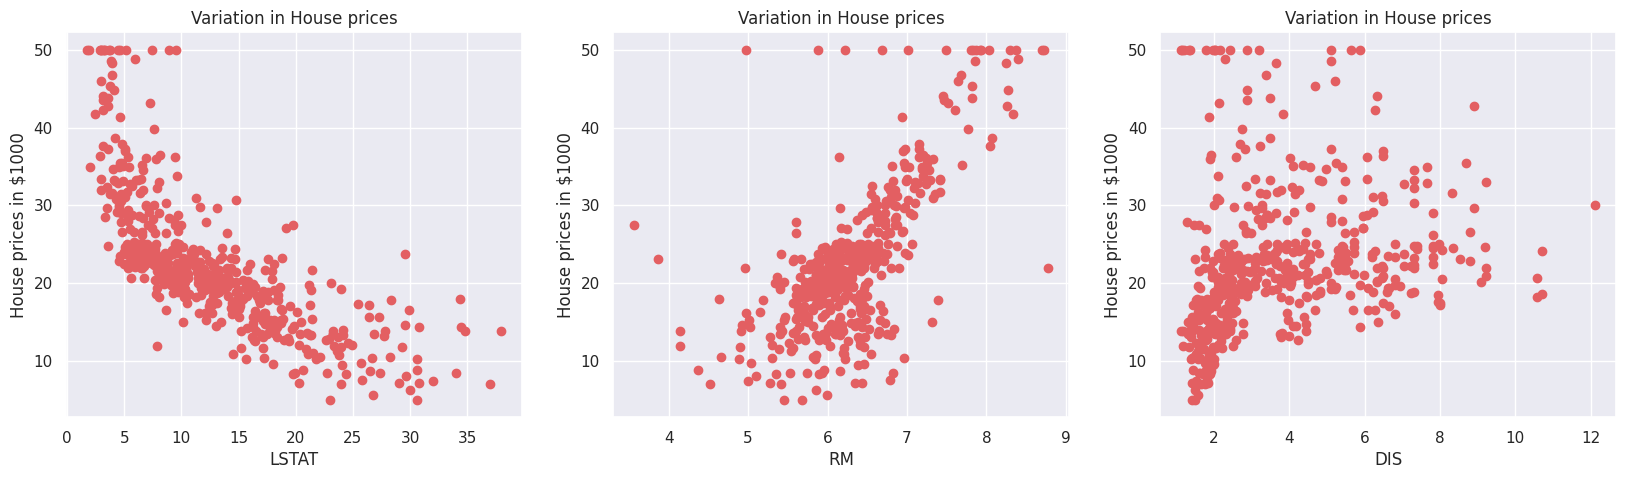

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT','RM','DIS']
target = bos['PRICE']

for i,col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x= bos[col]
  y = target
  plt.scatter(x,y,marker='o', color='#e35f62')
  plt.title('Variation in House prices')
  plt.xlabel(col)
  plt.ylabel('House prices in $1000')

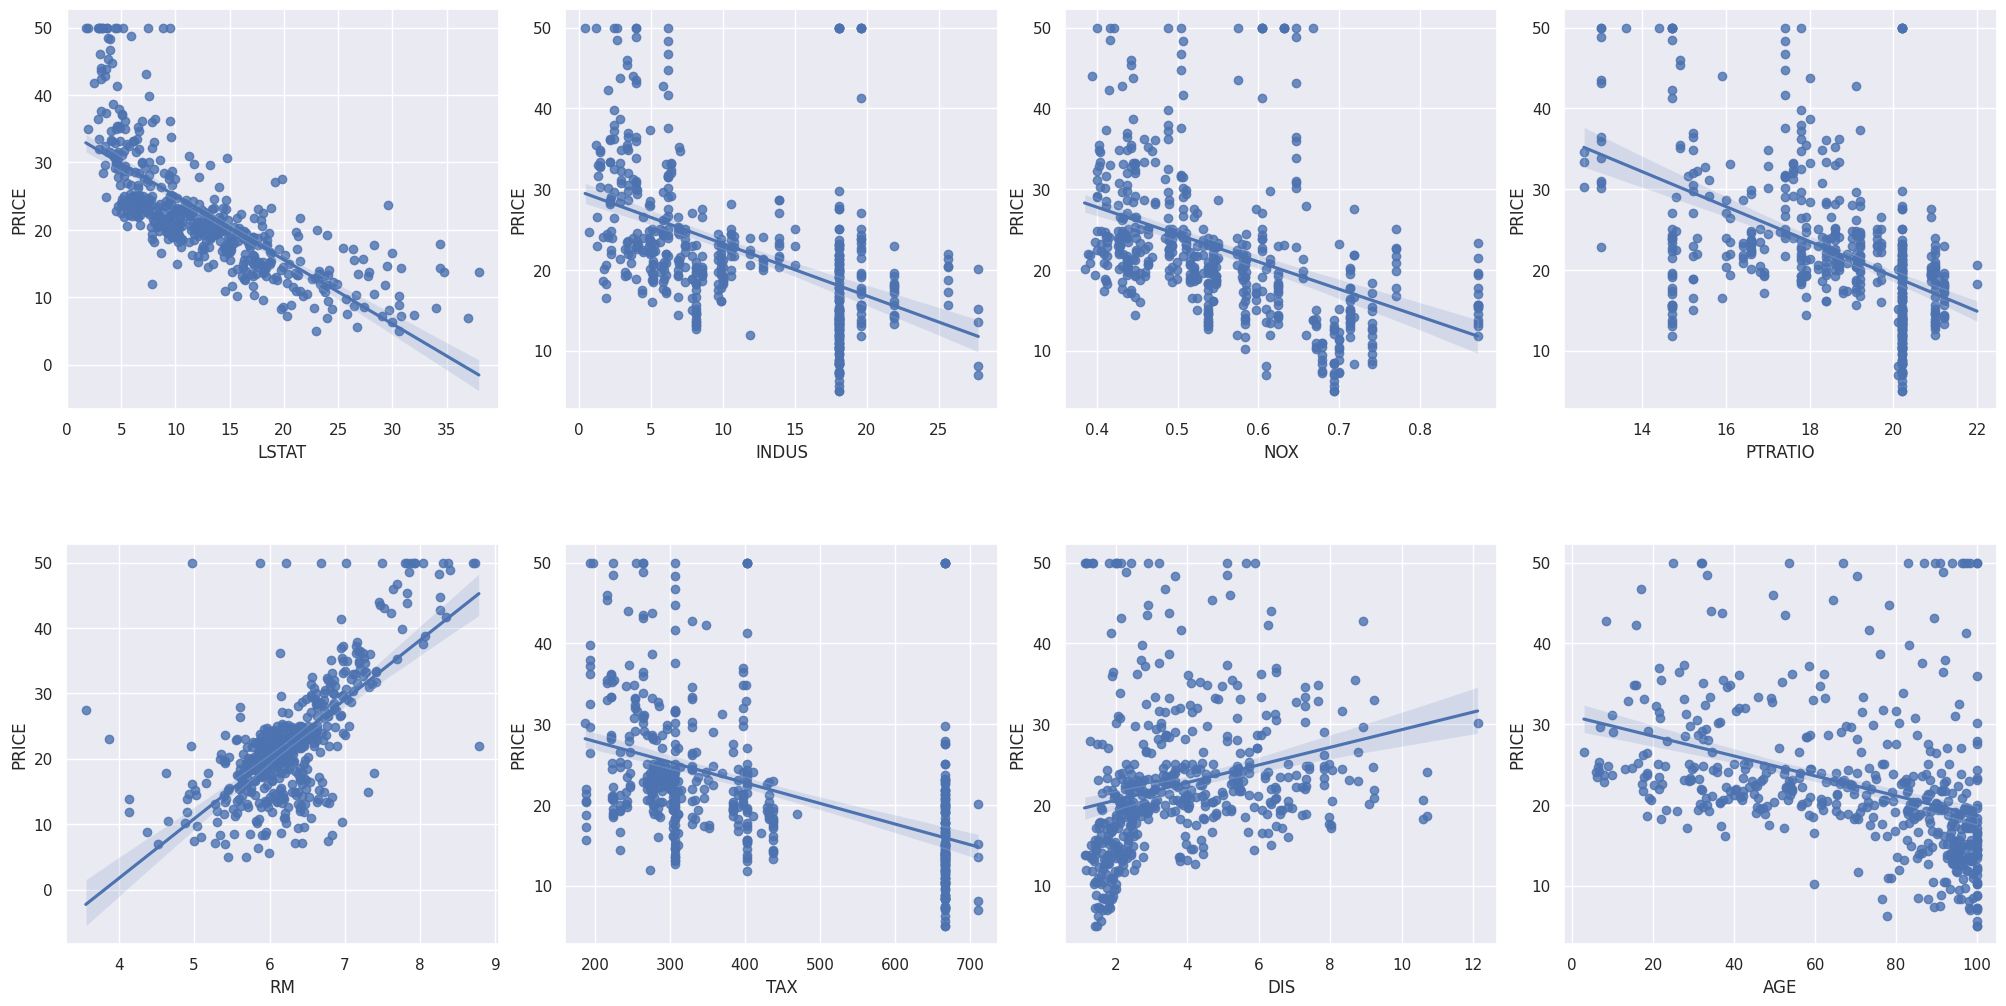

In [ ]:
columns_sels = ['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE']
x= bos.loc[:,columns_sels]
y=bos['PRICE']

fig,axes = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index=0
axes = axes.flatten()
for i,k in enumerate(columns_sels):
  sns.regplot(y=y, x=x[k], ax = axes[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
bos.RM.shape

(506,)

In [ ]:
bos.PRICE.shape

(506,)

In [ ]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rooms,y_price, test_size=0.2,
                                                 random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


- Sklearn의 Linear regression 클래스

**input parameter**
- fit_intercept : 불 값으로, default = True. Intercept(절편) 값을 계산할 것인지 말지를 지정함. 만일 False로 지정하면 Intercept가 사용되지 않고 0으로 지정됨.

- normalize : 불 값으로, 디폴트는 False임. fit_intercept가 False 인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함


**Features**

- coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피쳐 개수)

- intercept_ : intercept 값


#다중 공성선 문제(multicollinearity problem)

## 참고 : 선형 회귀분석의 4가지 기본가정(https://kkokkilkon.tistory.com/175)

선형회귀의 가정은 4가지 정도가 있다.

1. 독립변수와 종속변수 간의 선형적인 관계를 가정한다.

2. 오차항은 정규분포를 따른다는 가정이다. (Normality)

3. 오차항은 등분산성을 가정한다.(Homoscedasticity)

4.  공분산성이 없다는 가정이다. (no multicollinearity) 

모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.

-> 어처구니 없는 해석을 하게 만듬


- 피쳐 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity) 


- RMSE(Root Mean Squared Error) :MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다  더 커지는 특성이 있으므로 MSE에 루트를 씌움.


## $R^2 = {\dfrac {예측값 ~~~ Variance} {실제값~~~Varivance} } $

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Train에 대한 평가
reg_1 = LinearRegression()
reg_1.fit(X_train,y_train)

y_train_predict = reg_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = round(reg_1.score(X_train,y_train),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [ ]:
#model evaluation for test set
y_pred = reg_1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = round(reg_1.score(X_test,y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.69




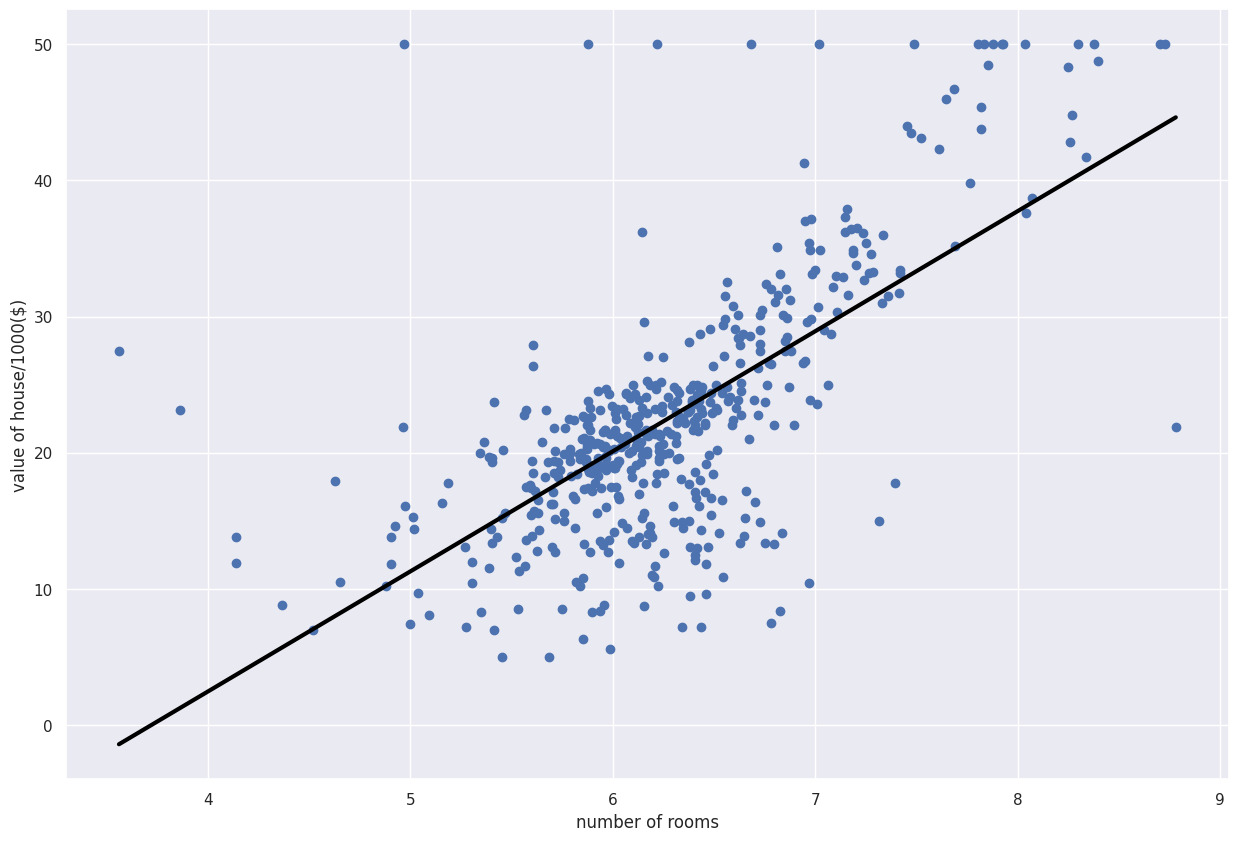

In [ ]:
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black',
         linewidth=3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### Regression Model for ALL the variables

In [ ]:
X = bos.drop('PRICE',axis=1)
y = bos['PRICE']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

LinearRegression()

In [ ]:
#model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = round(reg_all.score(X_train,y_train),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [ ]:
#model evaluation for training set

y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2 = round(reg_all.score(X_test,y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.928602182665333
R2 score is 0.67




# 05/10


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.0.2

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#  boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston dataset의 target array는 주택 가격
#이를 컬럼 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)
bostonDF

Boston 데이터셋 크기: (506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

- CRIM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

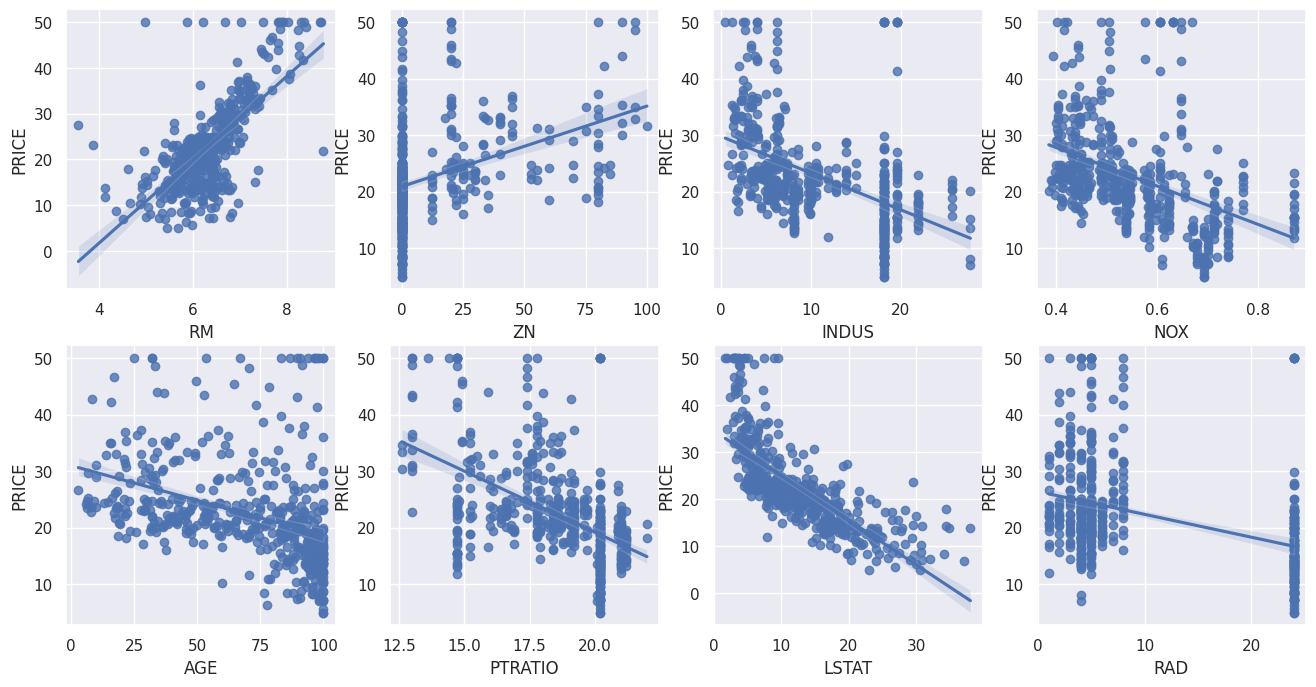

In [ ]:
fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  #seaborn의 regplot을 이용해 산점도와 선형 회귀 직성을 함께 표현
  sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

#linear Regression OLS(ordinary Least Square(OLS) method)
#error function을 gradient method로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3f}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164485
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

- 우리는 과적합(overfitting)을 방지하는 것이 중요하다.
  - 과적합이란 train에서 성능이 좋고 Test에서 성능이 좋지 않는 것이다.
- 반대는 과소적합(underfitting)이라고 함.


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1,inplace=False)
lr = LinearRegression()

#K-Fold Cross validation
# cross_val_score()로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
#회귀의 값은 작아지면 좋으니깐 마이너스를 취하면 작으면 작아지는게 좋음
print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 scores: {0:.3f}'.format(avg_rmse))


5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 scores: 5.829


## 데이터 셋: kaggle titanic(https://www.kaggle.com/c/titanic)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('/content/drive/MyDrive/Titanic_test.csv')
train = pd.read_csv('/content/drive/MyDrive/Titanic_train.csv')

# 탐색적 자료 분석(Exploratory Data Analysis(EDA)


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train[train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [ ]:
train[train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts() #생존자를 카운트
  dead =train[train['Survived']==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) # [생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) # 그림을 그림

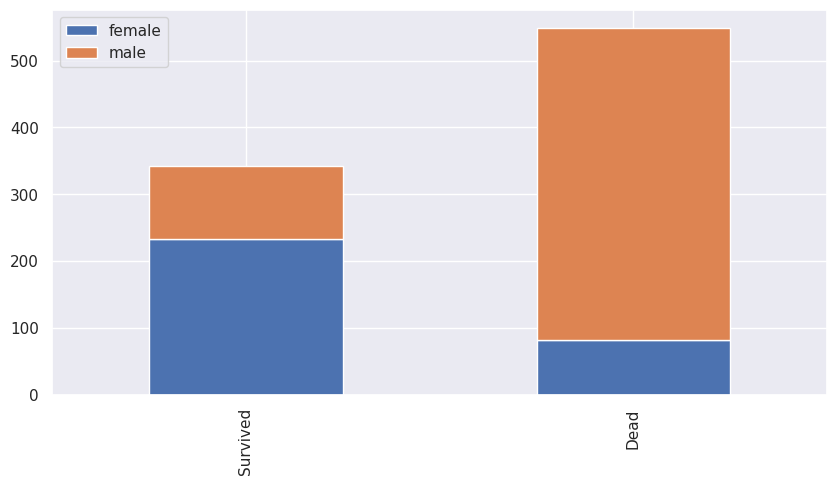

In [ ]:
bar_chart('Sex') #무슨 이유로 남성분들이 사망을 하셨을까?

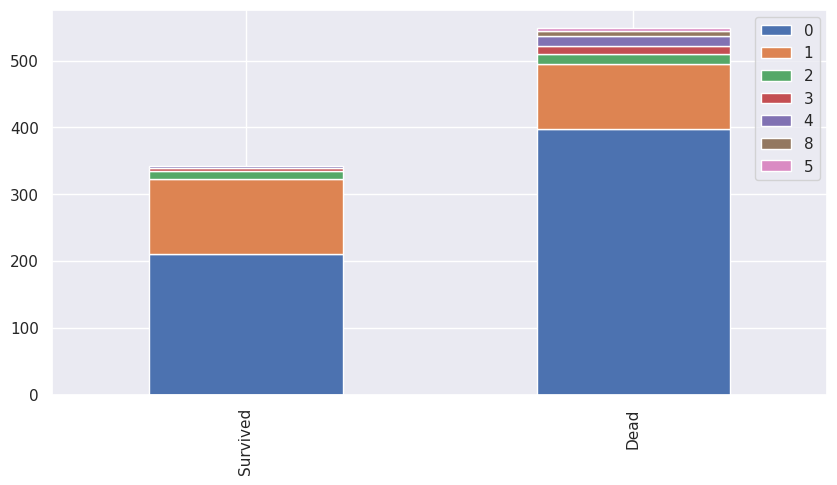

In [ ]:
bar_chart('SibSp') #함께 탑승한 형제 또는 배우자 수에 따라서 생존이 왜 다를까?

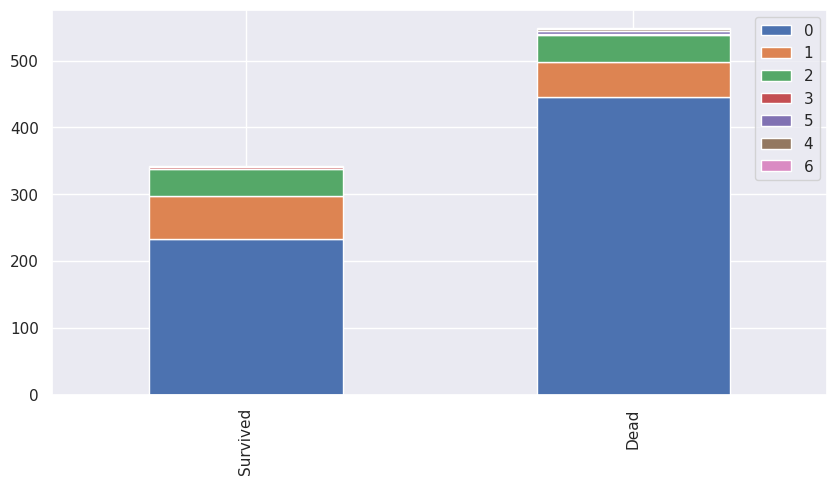

In [ ]:
bar_chart('Parch') #함께 탑승한 부모 또는 자녀 수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

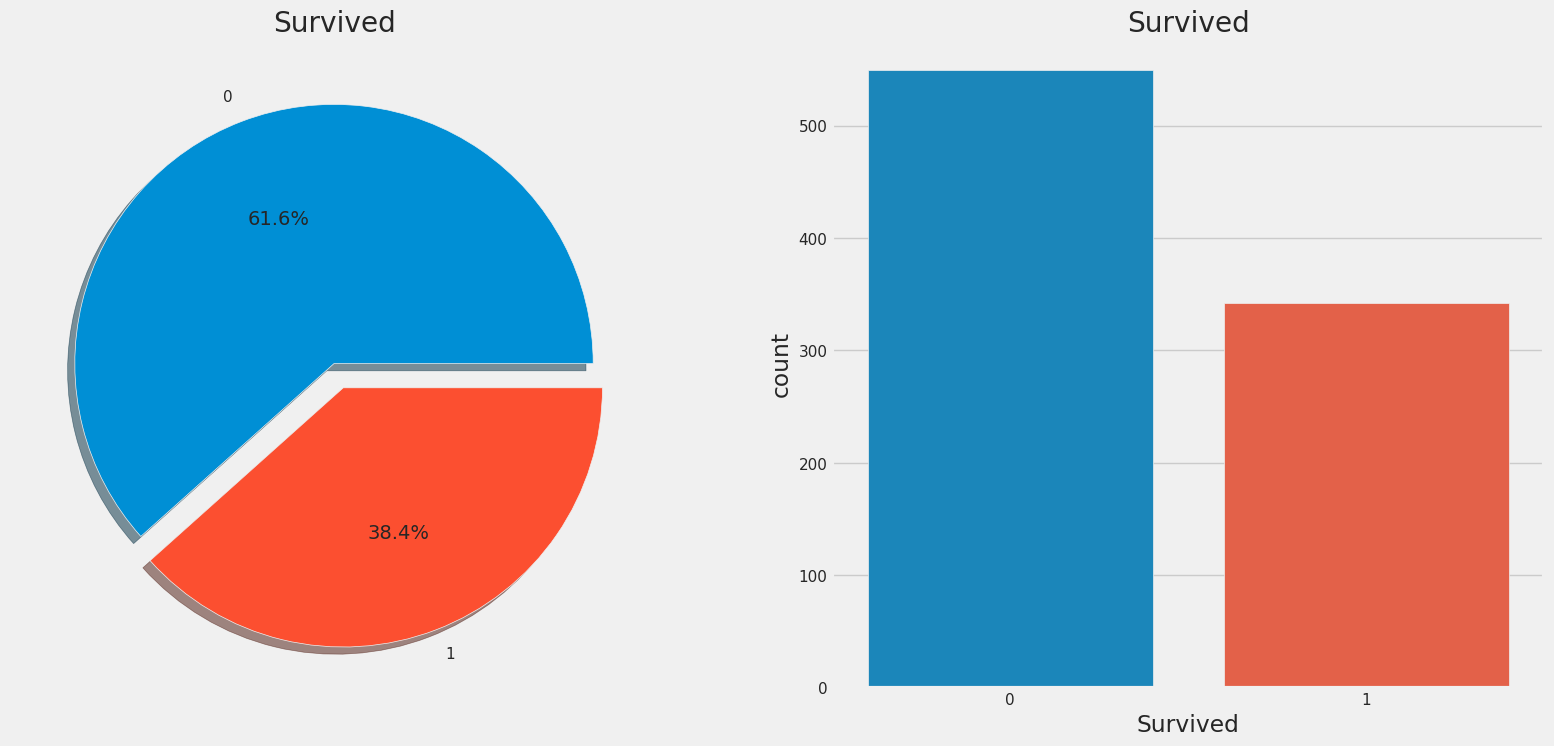

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#exploed : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄
#autopct : 각 항복의 퍼센트를 표시함.
#shadow : 그림자를 그릴 것 인지?
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=train['Survived'],ax = ax[1])
ax[1].set_title('Survived')
plt.show()

- Pclass

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

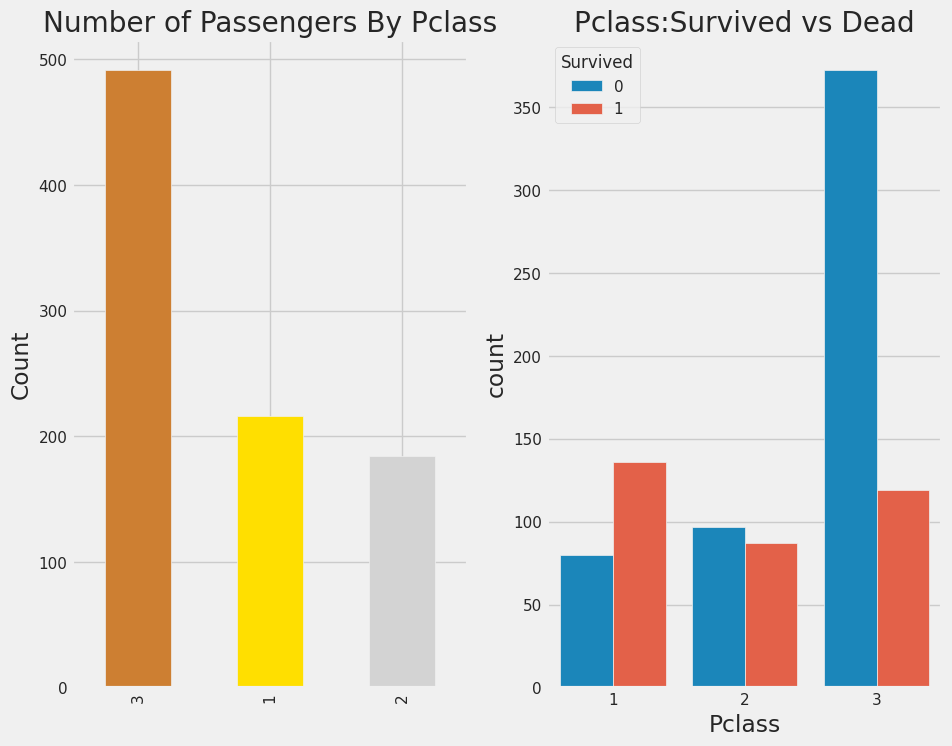

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data = train,ax =ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

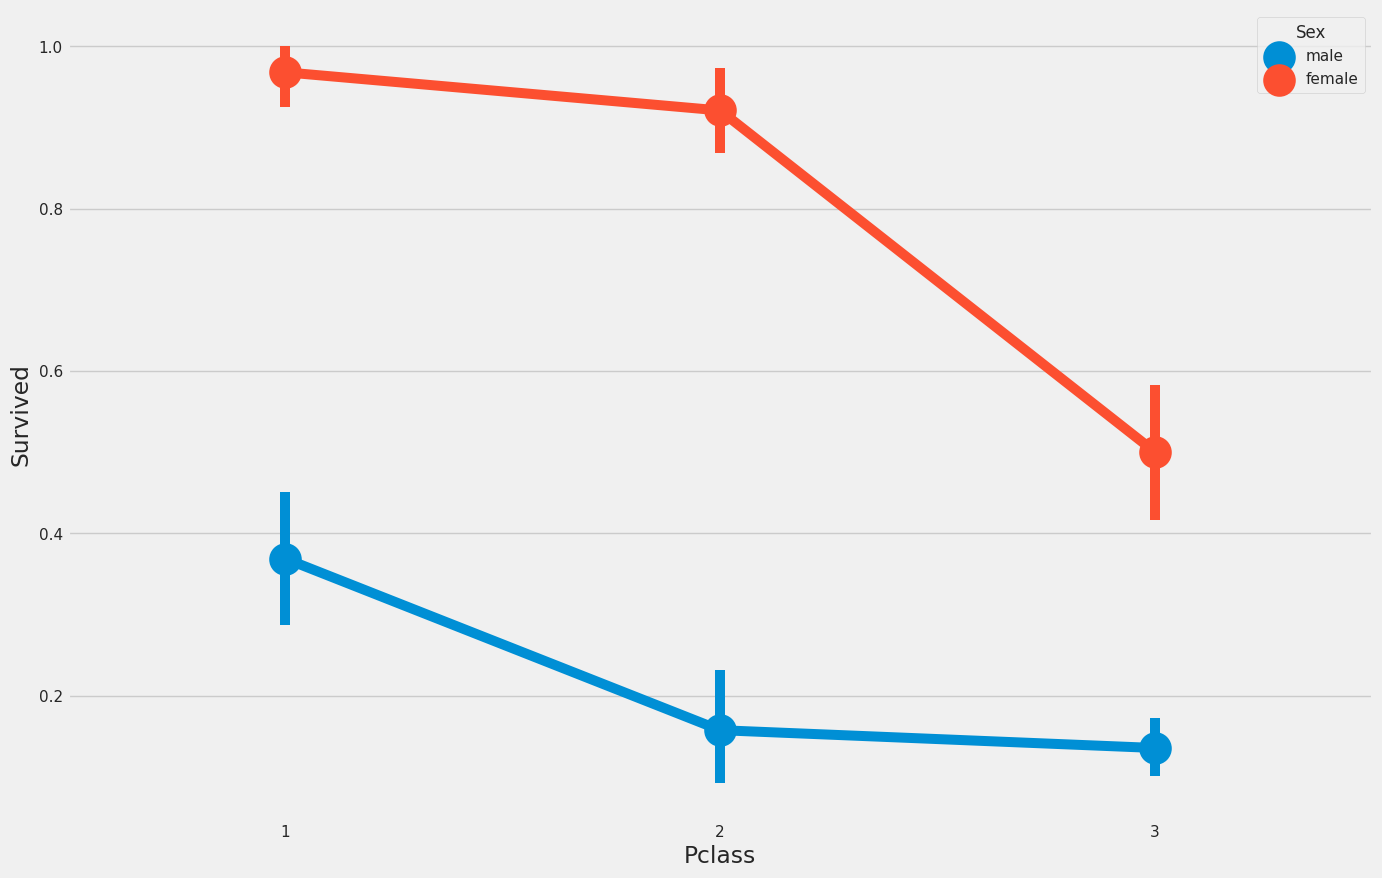

In [ ]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=train)
plt.show()

In [ ]:
print('Oldest Passeneger was of :', train['Age'].max(), 'Years')
print('Youngest Passeneger was of :', train['Age'].min(), 'Years')
print('Average Age on the ship :', train['Age'].mean(), 'Years') # 평균
print('Median Age on the ship :', train['Age'].median(), 'Years') # 중위수(중앙값)
print('Mode Age on the ship :', train['Age'].mode(), 'Years') # 최빈값

Oldest Passeneger was of : 80.0 Years
Youngest Passeneger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years
Median Age on the ship : 28.0 Years
Mode Age on the ship : 0    24.0
Name: Age, dtype: float64 Years


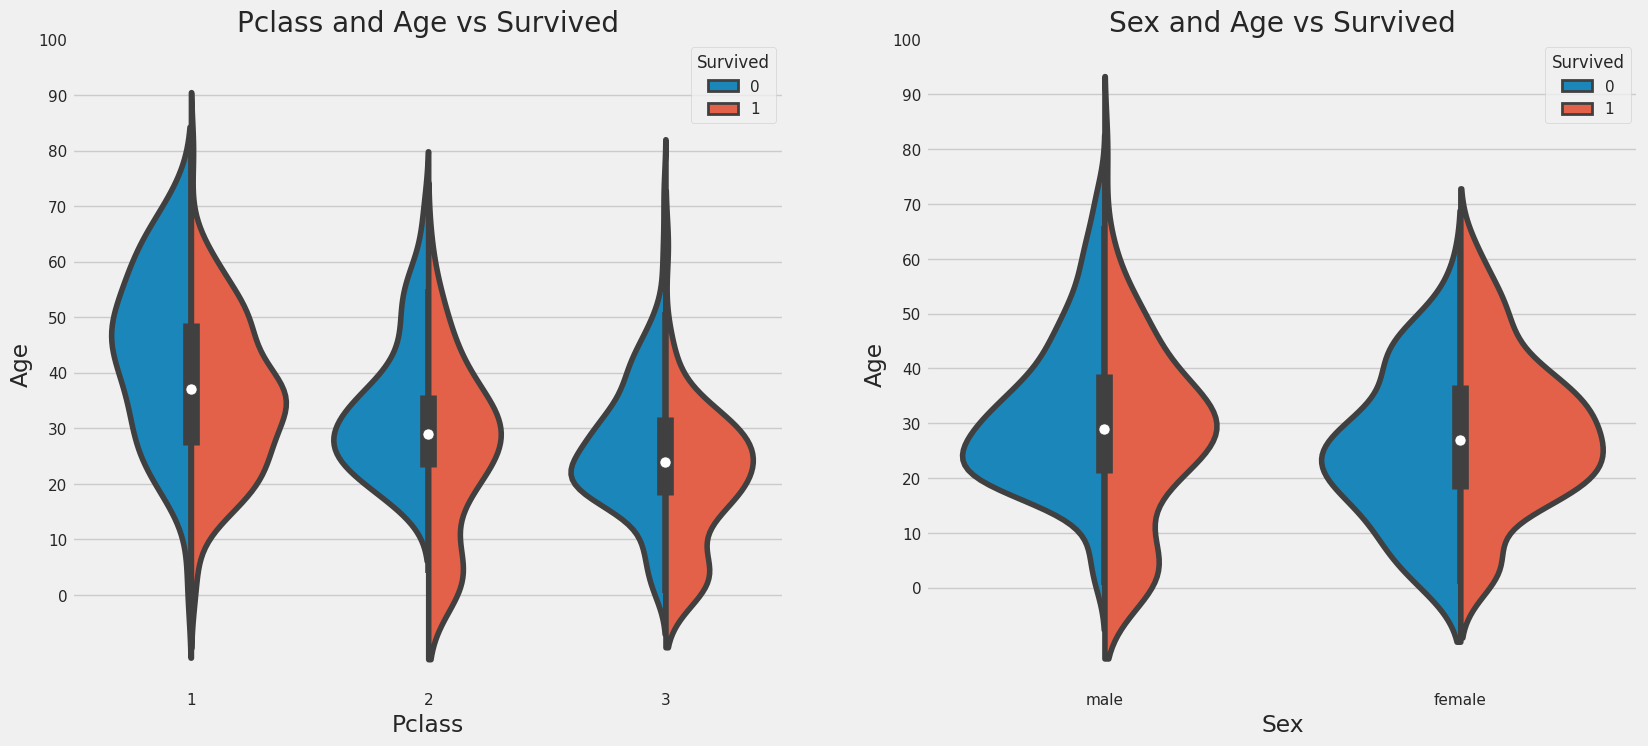

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age',hue='Survived',data = train, split = True,ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data = train, split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Name'].str

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#[A-Za_z]+)\. : 정규포현식(regular expression)
# -> 규칙 : 대문자나 소문자로 시작하다가 .으로 끝나면 추출해주세요.

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
train_test_data = [train,test]
#Name에 따라서 뭐가 다른가? -> 전에 각각해당하는 value를 count를 함.
for dataset in train_test_data:
  dataset['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#extract('([A-Za-z]+)\. ->졍규 표현식
# A-Z와 a-Z를 찾아서 어느지점에서 끝내는가? .을 기준으로 해서 자르라는 이야기 그다음에 count

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- expand 설명

In [ ]:
import numpy as np
import pandas as pd

s2 =pd.Series(['a_b_c','c_d_e', np.nan,'f_g_h'], dtype='string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [ ]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [ ]:
s2.str.split('_',expand=True) # 데이터프레임 형식으로 확장되었음.

0     1     2
0     a     b     c
1     c     d     e
2  <NA>  <NA>  <NA>
3     f     g     h

In [ ]:
s2.str.split('_',expand=False)

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [ ]:
s2.str.split('_',expand=True,n=1)

0     1
0     a   b_c
1     c   d_e
2  <NA>  <NA>
3     f   g_h

In [ ]:
s2.str.split('_',expand=True,n=2)

0     1     2
0     a     b     c
1     c     d     e
2  <NA>  <NA>  <NA>
3     f     g     h

### one-hot encoding

In [ ]:
#극단적으로 나눔.
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping) # 모든 피쳐에 적용해주세요.

In [ ]:
bar_chart('Title')

TypeError: ignored

In [ ]:
dataset['Sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [ ]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
#method : sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

In [ ]:
bar_chart('Sex')

TypeError: ignored

In [ ]:
pd.crosstab(train['Title'],train['Sex'])

Sex      0    1
Title          
0      517    0
1        0  182
2        0  125
3       60    7

- 결측치 처리

In [ ]:
#missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace는 채울꺼냐?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
#train에 결측치 처리를 하였다면, test에도 똑같이 처리를 해야됨.
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [ ]:
train['Age'].isna().sum()

0

In [ ]:
train[['Title','Age']].groupby(['Title'], as_index = False).mean()

Title        Age
0      0  31.823017
1      1  21.620879
2      2  35.776000
3      3  19.577164

- 가설 2)사망자의 나이가 어떻게 될까?+생존자

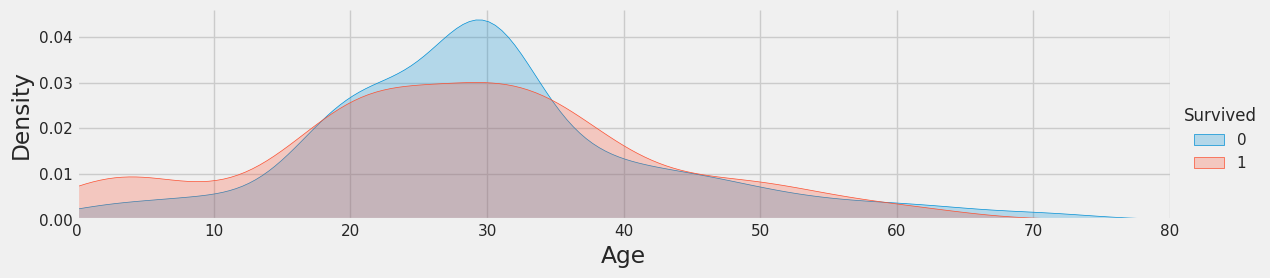

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 어러개의 그래프로 쪼개서 표현할때 유용함
# FeactGrid는 Colum, row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
#aspect : subplot의 세로 대비 가로의 비율.
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()
# 20-30대에 사망률 > 생존률이 높다 왜 그럴까?

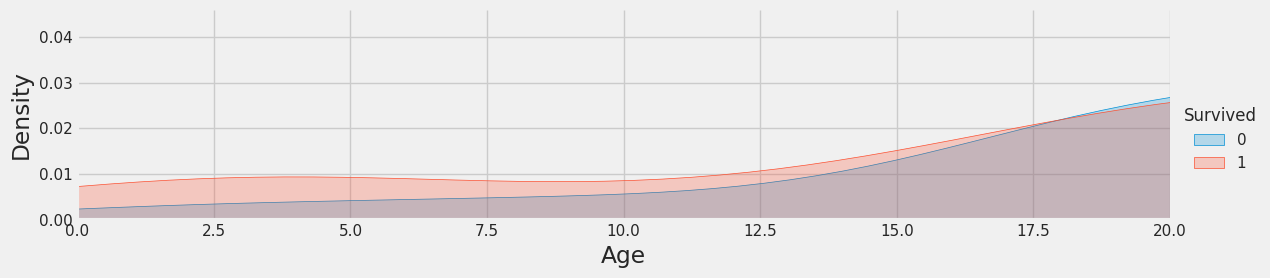

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(0,20)

plt.show()
# 0~20까지 나이로 자름.

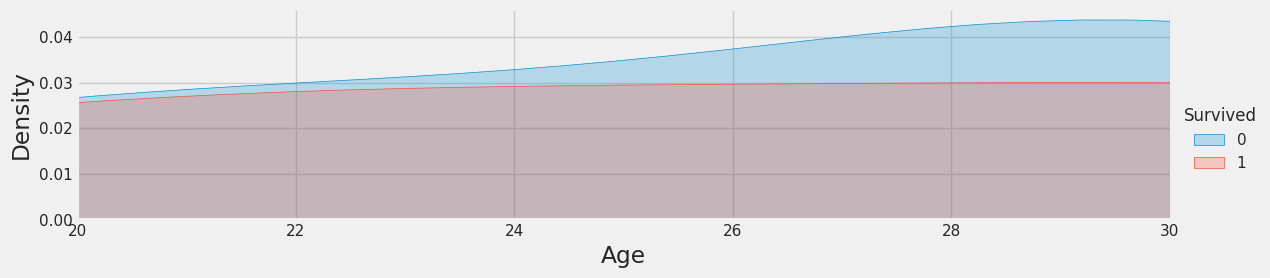

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30)

plt.show()
#20-30까지 나이로 자름.

0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)

잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0,
    dataset.loc[ ((dataset['Age'] >16) and (dataset['Age']<=26)),'Age']=1

ValueError: ignored

#컴마로 연결을 해버리니깐, multi index로 받아들여서 동시에 처리가 안됨

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[ ((dataset['Age'] >16) & (dataset['Age']<=32)),'Age']=1
    dataset.loc[ ((dataset['Age'] >32) & (dataset['Age']<=48)),'Age']=2
    dataset.loc[ ((dataset['Age'] >48) & (dataset['Age']<=64)),'Age']=3
    dataset.loc[dataset['Age'] > 64, 'Age'] =4
    dataset['Age'] = dataset['Age'].map({0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'}).astype(str)

In [ ]:
bar_chart('Age')

- FamilySize
  - 함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수.
  - 혼자탄거랑 가족등이랑 탄거랑 어떻게 다를까.?
  - SibSp + Parch

In [ ]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1
#솔로일 가능성이 있기 때문에 1을 더해줌. 왜냐하면 파이썬은 0부터 숫자를 세기 때문에

In [ ]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자일 경우는 사망률,생존률이 높음

In [ ]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId',axis=1).copy()

In [ ]:
X_train # drop된 것을 확인하세요.

In [ ]:
X_test.isna().sum()

In [ ]:
X_test['Fare'].fillna(0,inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Name',axis=1, inplace=True)
X_test.drop('Name',axis=1, inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Ticket',axis=1, inplace=True)
X_test.drop('Ticket',axis=1, inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Cabin',axis=1, inplace=True)
X_test.drop('Cabin',axis=1, inplace=True)

In [ ]:
# X_test.drop('Cabin',axis=1, inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Age',axis=1, inplace=True)
X_test.drop('Age',axis=1, inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Title',axis=1, inplace=True)
X_test.drop('Title',axis=1, inplace=True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Embarked',axis=1, inplace=True)

X_test.drop('Embarked',axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
#데이터가 정렬되어 있을 경우도 있기 때문에 데이터를 shuffle 해줌.
from sklearn.utils import shuffle

lig_reg = LinearRegression()
lig_reg.fit(X_train,y_train)

lig_reg.score(X_train,y_train)

In [ ]:
y_pred = lig_reg.predict(X_test)

df1 = pd.DataFrame(y_pred)
df1

- 당뇨병 예측 하기.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균 혈압
- s1 : 혈중 총콜레스테롤
- s2 : 저밀도 지질단백질
- s3 : 고밀도 지질단백질
- s4 : 총 콜레스테롤 수치
- s5 : 혈중 트리글리세라이드 수치
- s6 : 혈당 수치

In [ ]:
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

In [ ]:
print(dir(diabetes))

In [ ]:
print(type(diabetes))

In [ ]:
print(diabetes.DESCR)

- input data 보기

In [ ]:
diabetes.data[0:3]

- output data 보기

In [ ]:
diabetes.target[0:3]

In [ ]:
diabetes['feature_names']

- 당뇨병 환자 데이터 시각화 하기



In [ ]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
df['target'] = diabetes.target
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [ ]:
df_corr = df.corr()
df_corr

In [ ]:
cor_order = df_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)
cor_order

- 상관계수(-1 ~ 1까지,0이면 관계가 없음.)가 0.5를 넘은 bmi와 s5대상으로 산점도와 회귀선을 그려보자.

In [ ]:
names = ['target','bmi', 's5']
diabetes_df = df.loc[:,names]

In [ ]:
plt.figure(figsize=(16,6))
for i,name in enumerate(names[1:]):
  ax = plt.subplot(1,2,i+1)
  sns.regplot(x=name, y=names[0], data = diabetes_df,ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_data=diabetes_df.loc[:, ['bmi', 's5']]
y_data=diabetes_df.loc[:, 'target']

X_train,X_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

In [ ]:
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

In [ ]:
pred = lr.predict(X_test)

- bmi prediction

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

- s5 prediction

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)

In [ ]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

# 05/11

# 회귀분석 실습 2
## 공공 자전거 수요 예측(Bike Sharing Demand)

###https://www.kaggle.com/c/bike-sharing-demand/overview

 - 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를 
  
  기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.
  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지
  - 데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.

### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [ ]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')

df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
print(df_train.shape,df_test.shape)

(10886, 12) (6493, 9)


In [ ]:
df_train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
df_train.info() # datetime : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_train['datetime'] #0번째 : 2011-01-01 00:00:00

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
df_train["date"] = df_train.datetime.apply(lambda x : x.split()[0])
df_train["hour"] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.day_name[
    datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  weekday     10886 non-null  object 
 15  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [ ]:
categoryVariablesList = ['hour','weekday','month','season','weather','holiday','workingday']
for var in categoryVariablesList:
    df_train[var] = df_train[var].astype('category')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


- 결측치 확인

In [ ]:
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

<Axes: >

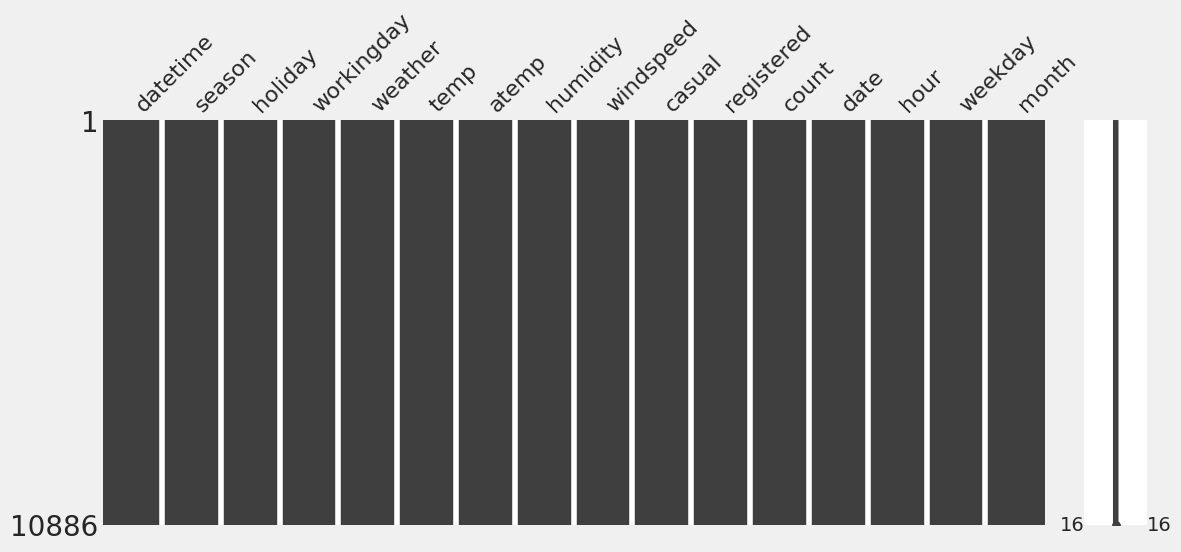

In [ ]:
import missingno as msno #결측치 보는 plot
msno.matrix(df_train,figsize=(12,5)) # 결측치가 있다면 하얀색 줄이 그어짐.

In [ ]:
df_train_1 =df_train.copy() # 훼손 방지
df_test_1 = df_test.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime'])

In [ ]:
type(df_train_1)

pandas.core.frame.DataFrame

In [ ]:
#dataFrame 가능한 것.
df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second
#요일 데이터 - 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'hour rental amount')]

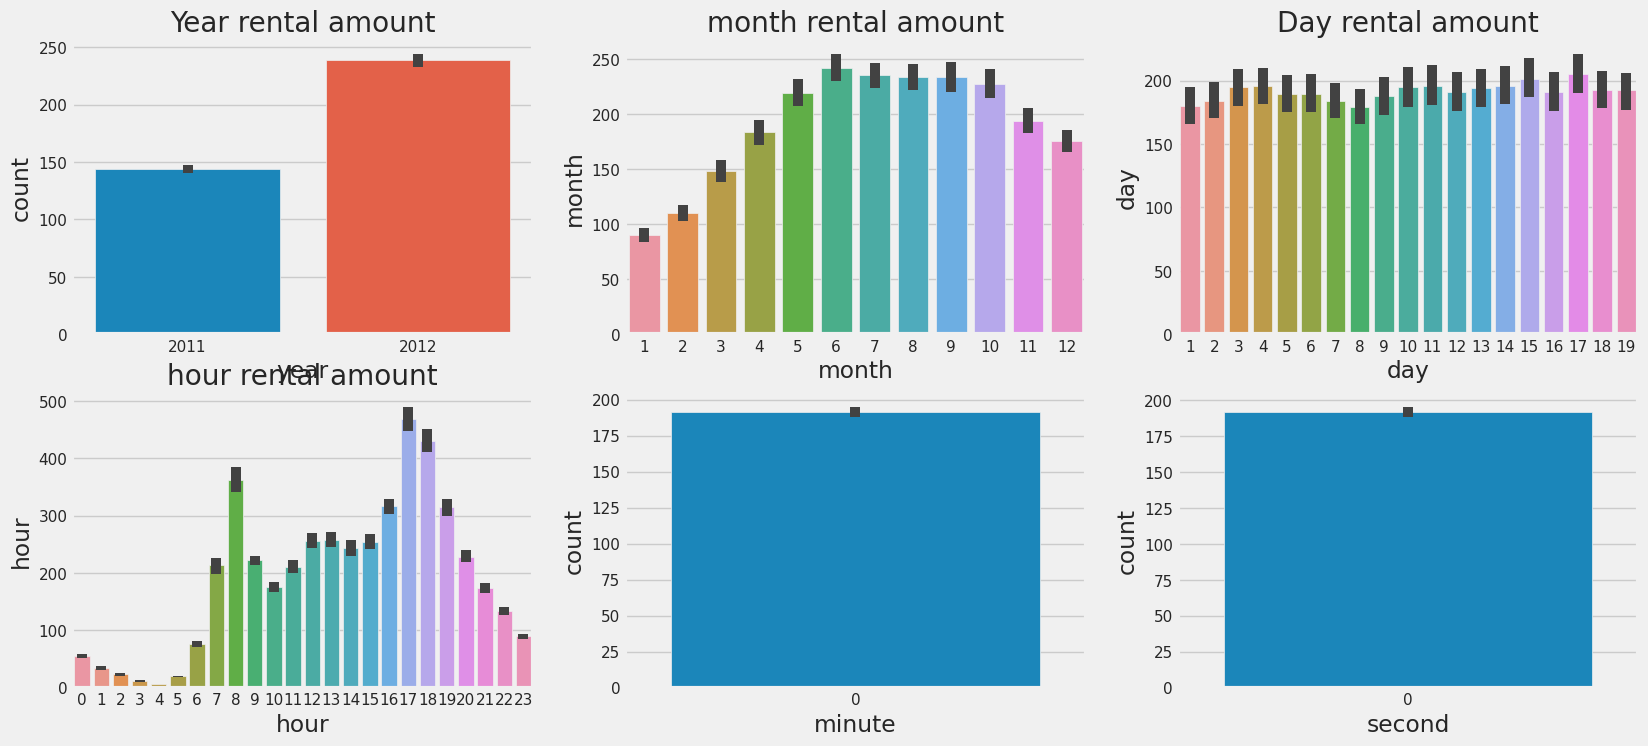

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data = df_train_1, x='year', y='count',ax=ax1)
sns.barplot(data = df_train_1, x='month', y='count',ax=ax2)
sns.barplot(data = df_train_1, x='day', y='count',ax=ax3)
sns.barplot(data = df_train_1, x='hour', y='count',ax=ax4)
sns.barplot(data = df_train_1, x='minute', y='count',ax=ax5)
sns.barplot(data = df_train_1, x='second', y='count',ax=ax6)

ax1.set(ylabel='count', title='Year rental amount')
ax2.set(ylabel='month', title='month rental amount')
ax3.set(ylabel='day', title='Day rental amount')
ax4.set(ylabel='hour', title='hour rental amount')
#Day는 분석하면 안됨. -> 달마다 요일이 달라서 카운트 마다 다릅니다 ->지표가 달라짐 -> 분석모델 X

Month rental amount을 보면, 겨울로 분리되는 12월의 경우 초봄인 3~4월의 대여량과 비슷하다는 점이었다. 워싱턴의 날씨 변화는 우리나라의 사계절과 비슷하다. (여기서 알수 있는 점은 계절의 영향은 별로 없구나)

또한 hour 파트에서 아침7시와 저녁 6~7시의 수요량이 다른 시간대들과 비교했을 때 굉장히 높은 것을 알 수 있다. 이는 출퇴근길에 자전거를 많이 이용하는 사람들이 많다고 예측해 볼 수 있다. (주말과 나눠서 보는 것이 필요하다.) 혹시라도 뭐가 다를지 모르겠어서

일별 대여량은 1일부터 19일까지만 있고 나머지 날짜의 경우는 test데이터에 들어가있다. 따라서 이 변수는 피쳐로 사용하면 안 된다!

### Quantile, Quartile, Percentile 개념 정리

- 참고 : https://blog.eunsukim.me/posts/understanding-quantile-quartile-and-percentile

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

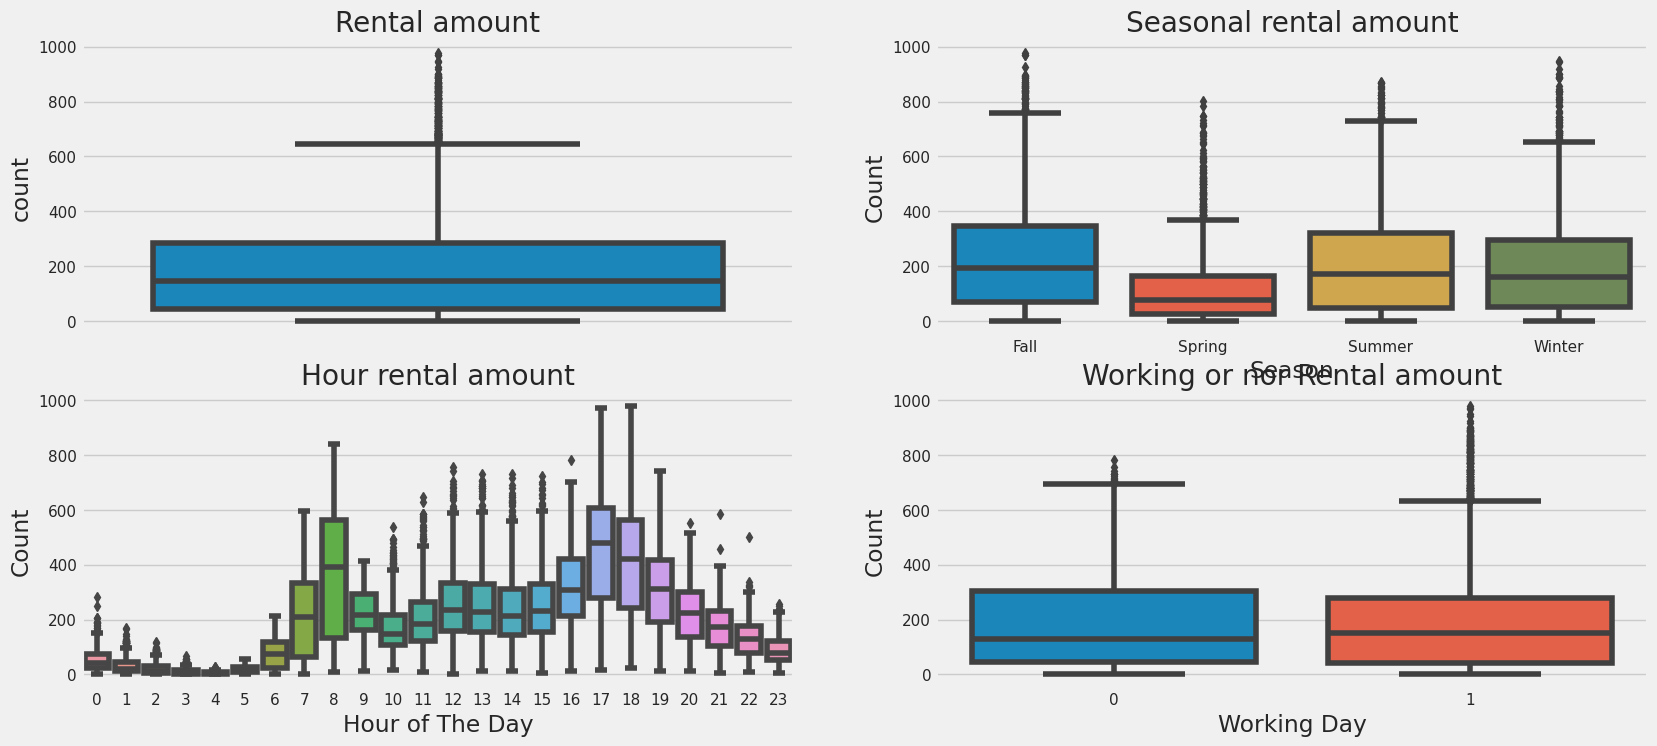

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1, y='count', x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1, y='count', x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1, y='count', x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season', ylabel='Count',title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day', ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day', ylabel='Count',title='Working or nor Rental amount')

# 이상치가 너무 많음 -> 이상치 처리를 해줘야 겠구나!

<Axes: xlabel='hour', ylabel='count'>

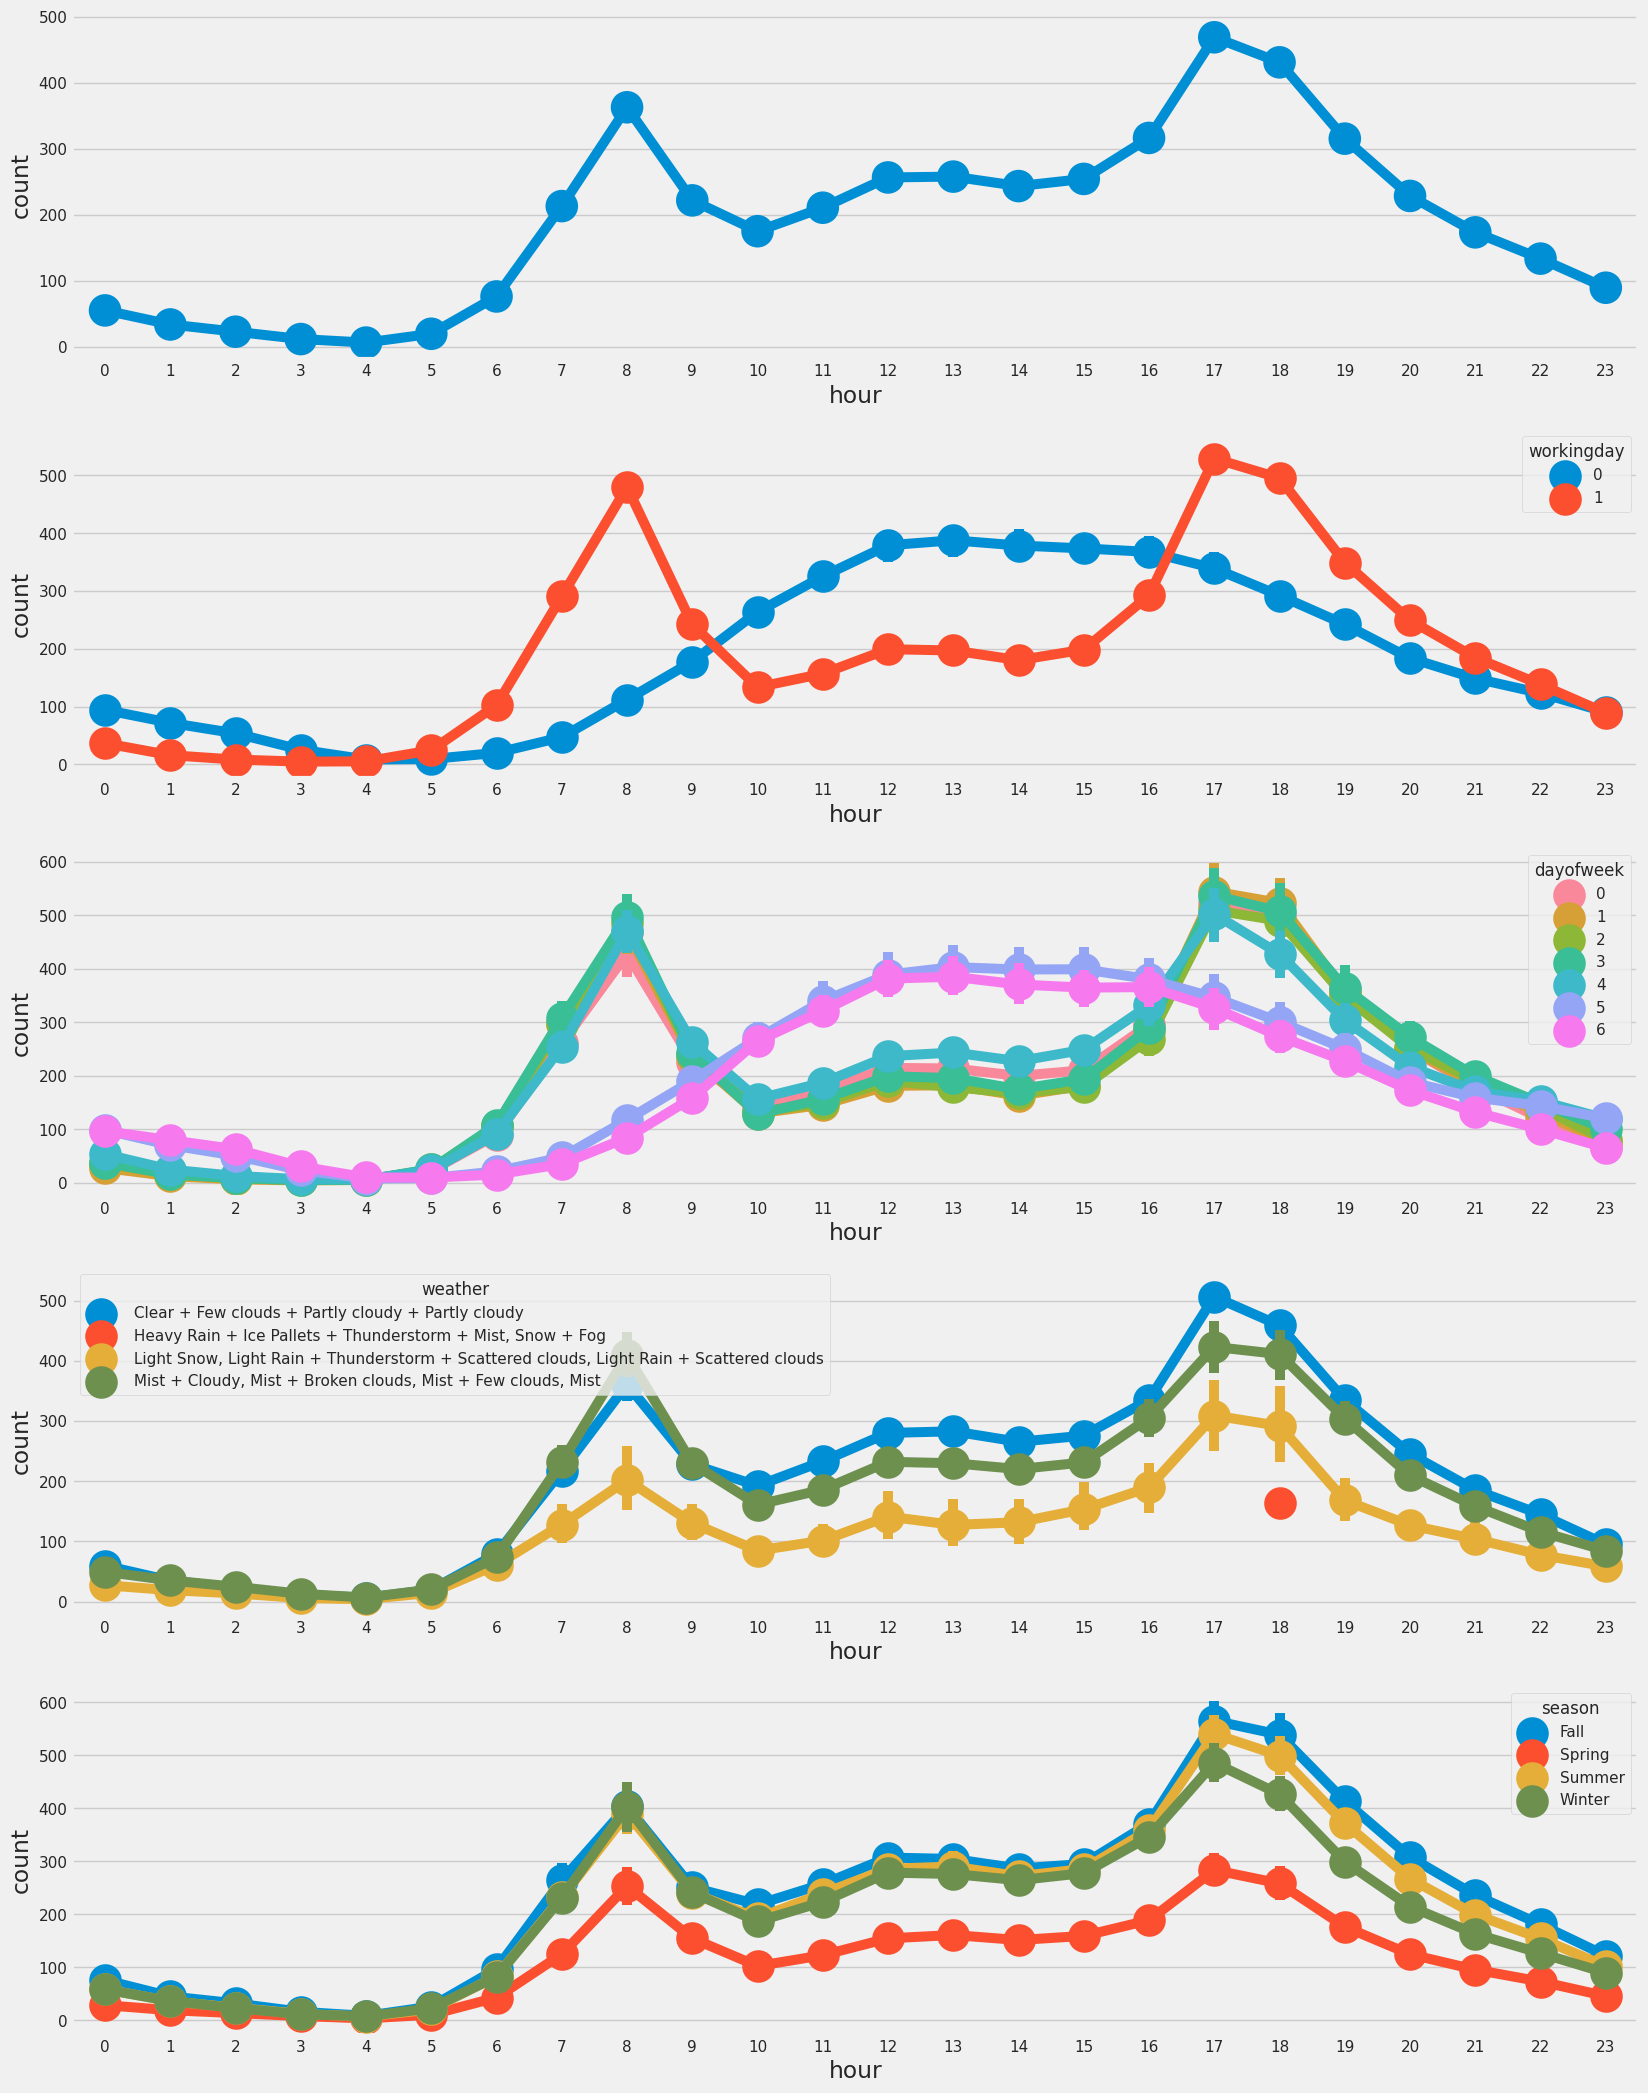

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# 꺽은선 그래프.
sns.pointplot(data =df_train_1, x='hour',y='count',ax=ax1)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='workingday',ax=ax2)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='dayofweek',ax=ax3)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='weather',ax=ax4)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='season',ax=ax5)

위 그래프를 보면 대여량은 특정 기간에 머물러 있고 특히 근무일이 아닐 때 대여량이 더 많은 것을 알 수 있다.

- 상관관계

In [ ]:
corrMatt = df_train_1.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for upper_triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False #상삼각행렬 False -> 하삼각행렬

NameError: ignored

<Axes: >

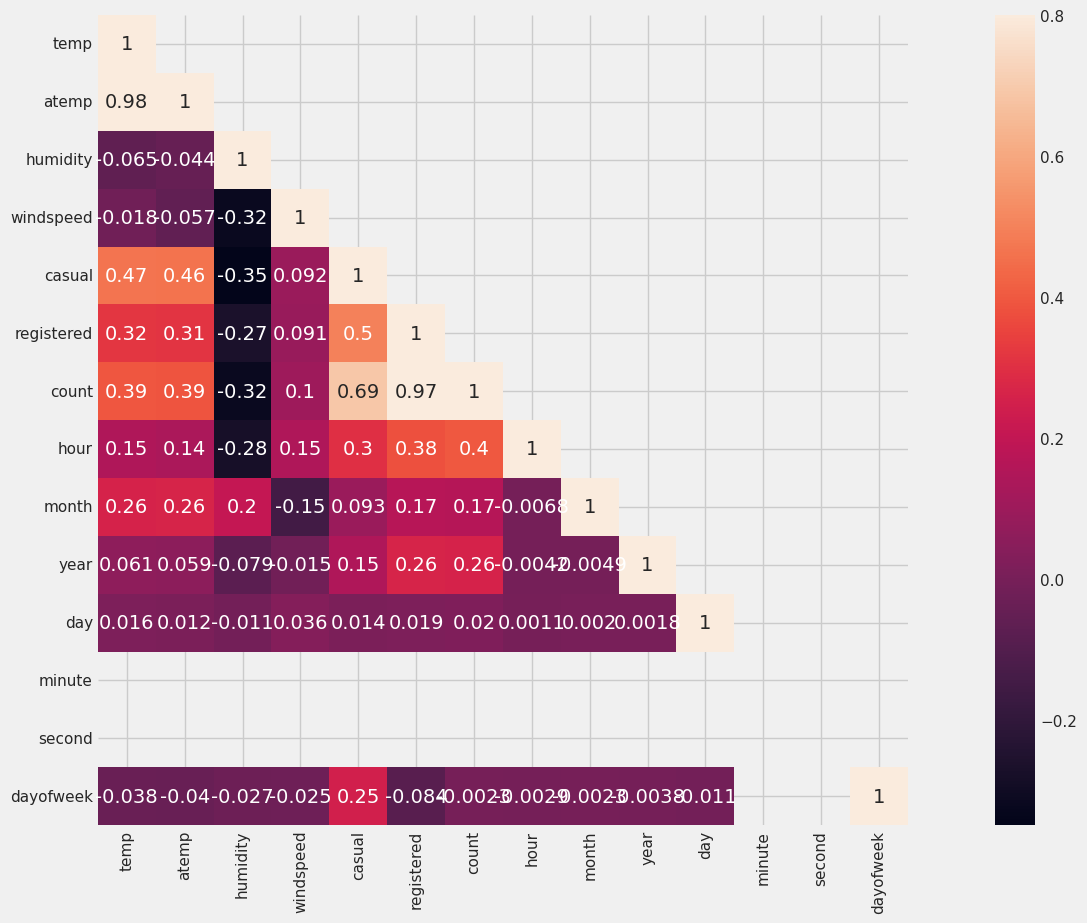

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

1. temp, humidity, windspeed는 상관관계가 거의 없다.
2. registered, casual는 상관관계가 높다!
3. atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피쳐로 사용하기에 적합하지 않을 수 있다.

#regplot으로 산점도 plot을 그림

<Axes: xlabel='humidity', ylabel='count'>

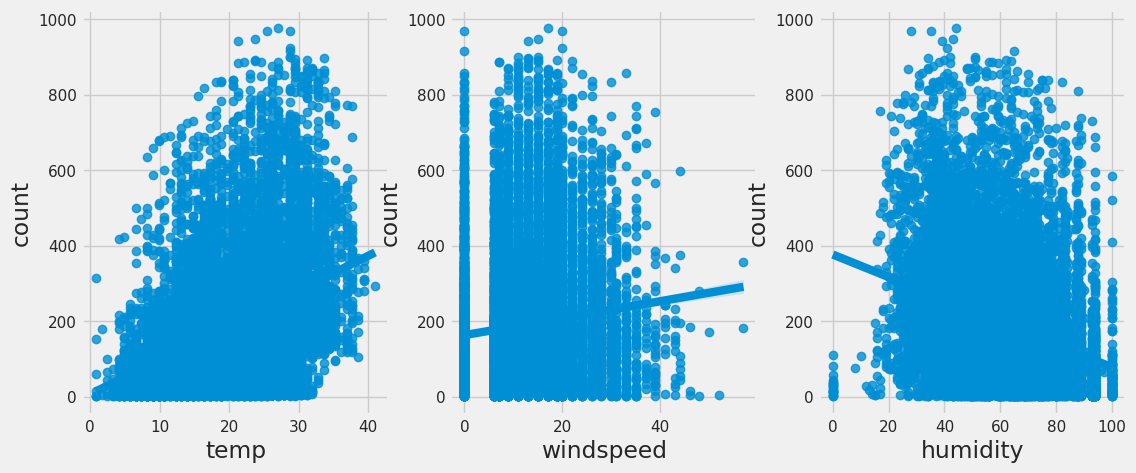

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data = df_train_1,ax=ax1)
sns.regplot(x='windspeed',y='count',data = df_train_1,ax=ax2)
sns.regplot(x='humidity',y='count',data = df_train_1,ax=ax3)

#temp,windspeed, humidity -> 회귀로 절대로 못맞침
#(상관계수가 낮음 ->scatter ->drop하는것이 좋지 않을까?)-> 항상 좋을까?-> 실험적이여야 함.

windspeed의 경우 0에 숫자가 몰려 있는 것으로 보아, 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측한다.

In [ ]:
# 월별 데이터 모아보기
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
df_train_1["year_month"] = df_train_1["datetime"].apply(concatenate_year_month)
print(df_train_1.shape)
df_train_1[["datetime", "year_month"]].head()

(10886, 22)


datetime year_month
0 2011-01-01 00:00:00     2011-1
1 2011-01-01 01:00:00     2011-1
2 2011-01-01 02:00:00     2011-1
3 2011-01-01 03:00:00     2011-1
4 2011-01-01 04:00:00     2011-1

<Axes: xlabel='year_month', ylabel='count'>

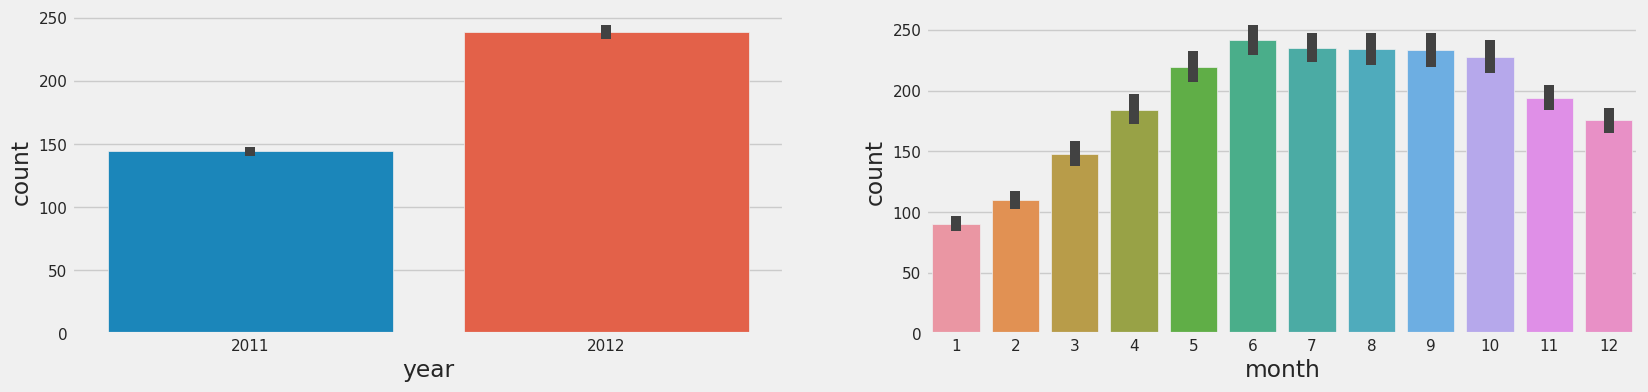

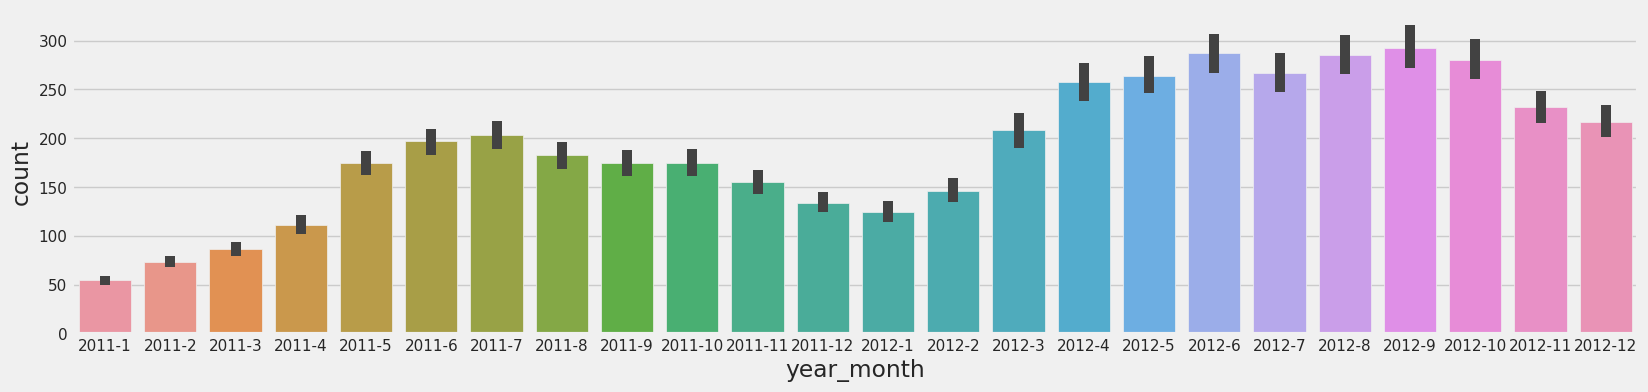

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data = df_train_1, x='year', y='count',ax=ax1)
sns.barplot(data = df_train_1, x='month', y='count',ax=ax2)

fig,ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data = df_train_1, x='year_month',y='count',ax=ax3)

분석 결과 : 2011년보다 2012년에 대여량이 더 많다. ->달로 나눠도 증가하고 있습니다.

#이상치 처리

## 방법1) IQR(Interquartile Range)  = Q3(75%)-Q1(25%)

$Q1-1.5*IQR ~:~$ 최소 제한선


$Q3 + 1.5*IQR ~:~$   최대 제한선



범위를 좀 더 조정

In [ ]:
#'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df_train_1['count'],25)
count_q1

#'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df_train_1['count'],75)
count_q3

# IQR = Q3 - Q1
count_IQR = count_q3 - count_q1
count_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_train_1_IQR = df_train_1[(df_train_1['count']>=(count_q1 - (1.5*count_IQR))) &
                          (df_train_1['count']<=(count_q3 + (1.5*count_IQR)))]
print(df_train_1_IQR)

                 datetime  season holiday workingday  \
0     2011-01-01 00:00:00  Spring       0          0   
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

## 방법2) 3-sigma, 평균 $\pm$ 3* 표준편차

In [ ]:
df_train_1_sigma = df_train_1[np.abs(df_train_1['count'] - df_train_1['count'].mean()) <
                              (3*df_train_1['count'].std())]
print(df_train_1_sigma)
#약 100개정도 잃어버림.

                 datetime  season holiday workingday  \
0     2011-01-01 00:00:00  Spring       0          0   
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

#IQR을 적용했을 때의 그림

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

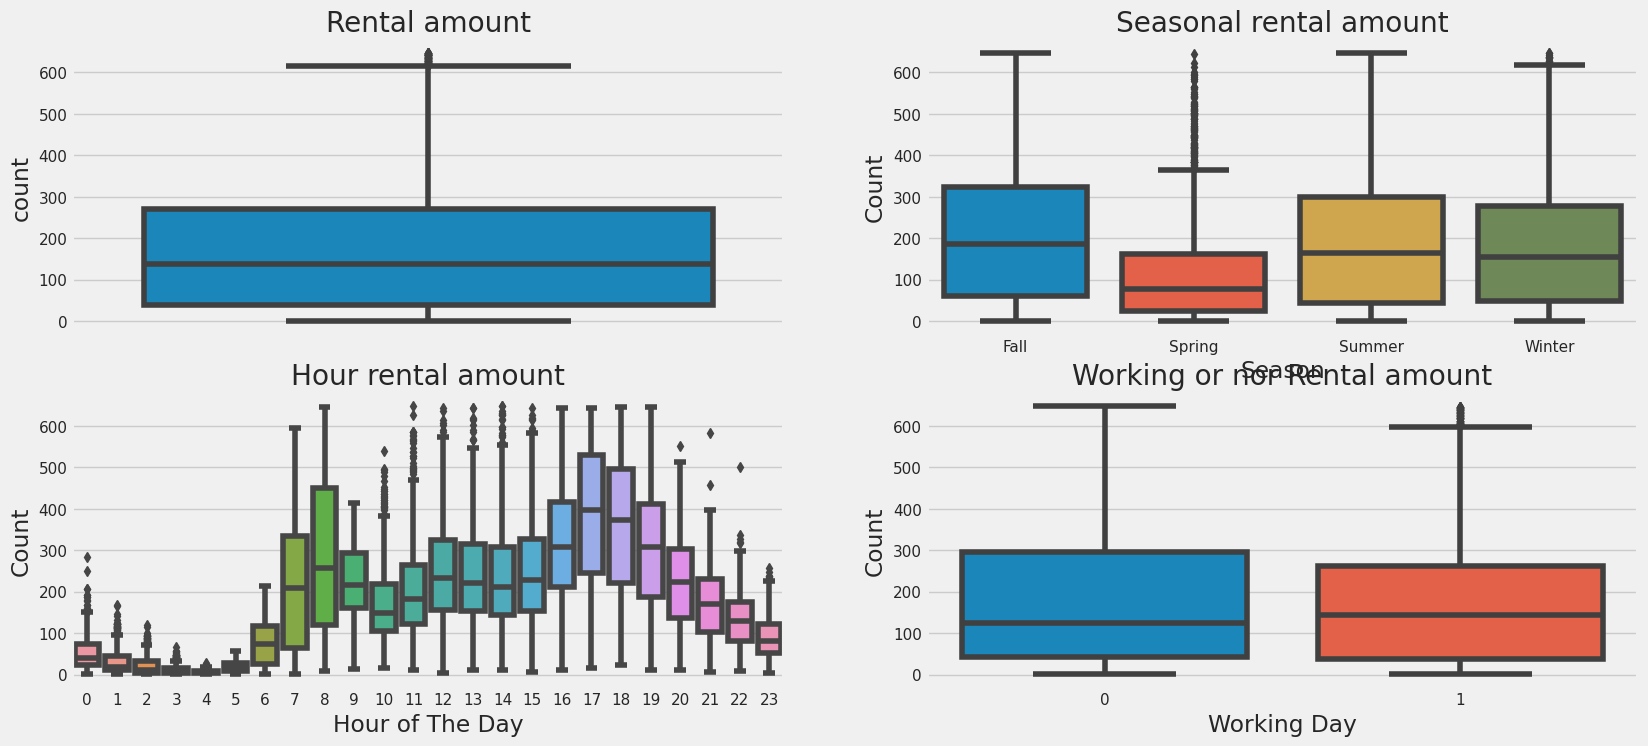

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_IQR, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_IQR, y='count', x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_IQR, y='count', x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_IQR, y='count', x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season', ylabel='Count',title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day', ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day', ylabel='Count',title='Working or nor Rental amount')


3-sigma를 적용했을 때

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

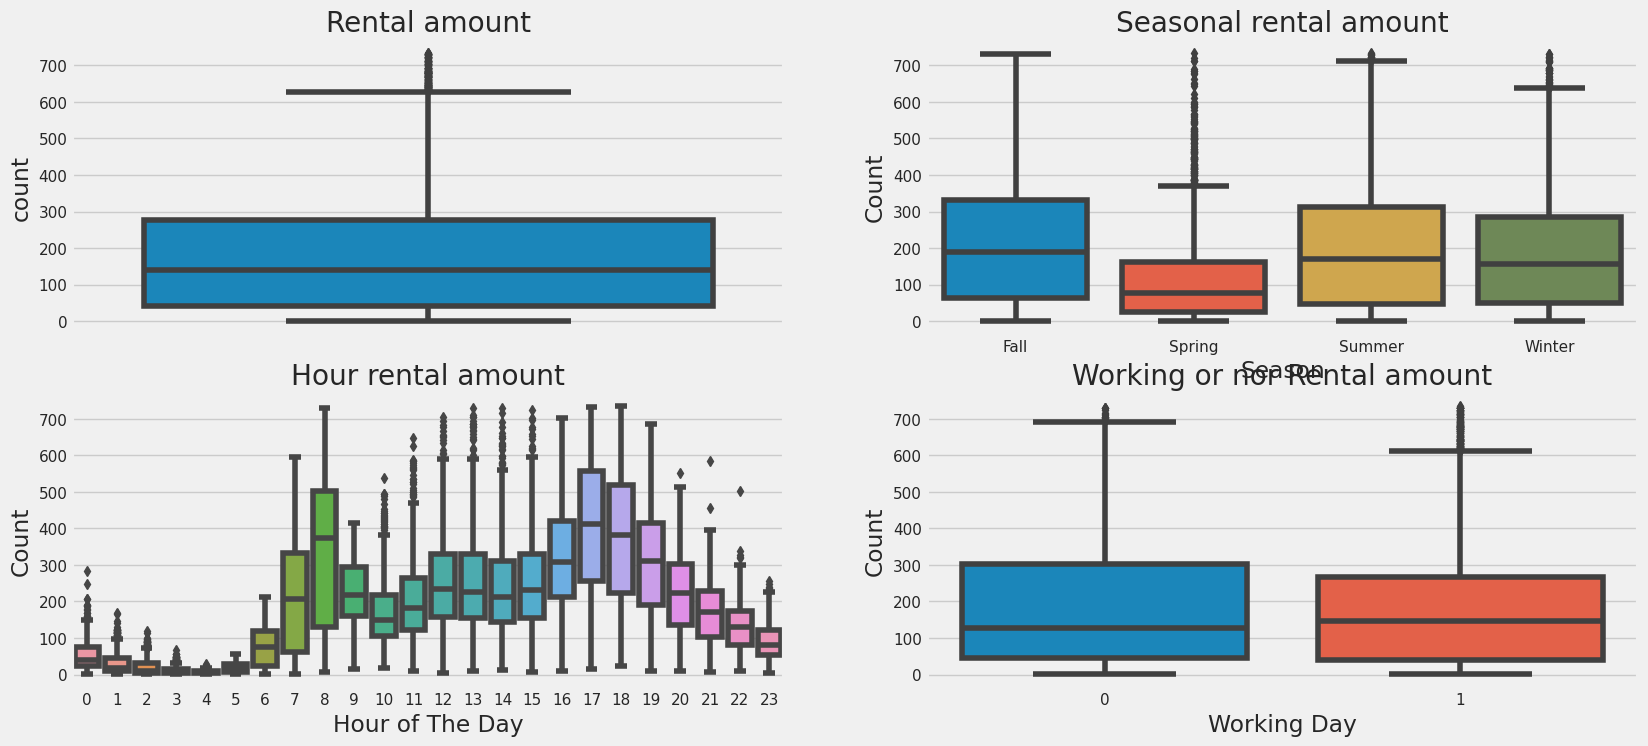

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_sigma, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_sigma, y='count', x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_sigma, y='count', x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_sigma, y='count', x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season', ylabel='Count',title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day', ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day', ylabel='Count',title='Working or nor Rental amount')


- 모델 적용

In [ ]:
dataTrain = pd.read_csv("/content/drive/MyDrive/train.csv")
dataTest = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

- Feature Engineering

In [ ]:
data['date'] = data.datetime.apply(lambda x:x.split()[0])
data['hour'] = data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x:x.split()[0].split('-')[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)

- 데이터 변환

In [ ]:
categoricalFeatureNames=['season','holiday','workingday','weather','weekday','month','year','hour']
numericalFeatureName = ['temp','humidity','windspeed','atemp']
dropFeatures = ['casual','count','datetime','date','registered']

In [ ]:
for var in categoricalFeatureNames:
  data[var] = data[var].astype('category')

- Splitting Train and Tset Data

In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
yLabelsCasual = dataTrain['casual']

In [ ]:
dataTrain

datetime season holiday workingday weather   temp   atemp  \
0      2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
1      2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2      2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3      2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4      2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                    ...    ...     ...        ...     ...    ...     ...   
10881  2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882  2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883  2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
10884  2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
10885  2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  casual  registered  count        date hour  year  \
0            81     0.0000     3.0        13.0   16.0  2011-01-01    0  2011   
1            80     0.0000     8.0        32.0   40.0  2011-01-01    1  2011   
2            80     0.0000     5.0        27.0   32.0  2011-01-01    2  2011   
3            75     0.0000     3.0        10.0   13.0  2011-01-01    3  2011   
4            75     0.0000     0.0         1.0    1.0  2011-01-01    4  2011   
...         ...        ...     ...         ...    ...         ...  ...   ...   
10881        50    26.0027     7.0       329.0  336.0  2012-12-19   19  2012   
10882        57    15.0013    10.0       231.0  241.0  2012-12-19   20  2012   
10883        61    15.0013     4.0       164.0  168.0  2012-12-19   21  2012   
10884        61     6.0032    12.0       117.0  129.0  2012-12-19   22  2012   
10885        66     8.9981     4.0        84.0   88.0  2012-12-19   23  2012   

      weekday month  
0           5     1  
1           5     1  
2           5     1  
3           5     1  
4           5     1  
...       ...   ...  
10881       2    12  
10882       2    12  
10883       2    12  
10884       2    12  
10885       2    12  

[10886 rows x 17 columns]

- Dropping Unncessary Vatiables

In [ ]:
dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

RMSLE Scorer

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour) 
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

- Numeri으로 변환

In [ ]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
#errors='coerce' : 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환.
dataTrain['year'] = pd.to_numeric(dataTrain.year,errors='coerce')
dataTrain['month'] = pd.to_numeric(dataTrain.month,errors='coerce')
dataTrain['hour'] = pd.to_numeric(dataTrain.hour,errors='coerce')
dataTrain['weekday'] = pd.to_numeric(dataTrain.weekday,errors='coerce')

dataTrain['season'] = pd.to_numeric(dataTrain.season,errors='coerce')
dataTrain['holiday'] = pd.to_numeric(dataTrain.holiday,errors='coerce')
dataTrain['workingday'] = pd.to_numeric(dataTrain.workingday,errors='coerce')
dataTrain['weather'] = pd.to_numeric(dataTrain.weather,errors='coerce')

- Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

RMSLE Value For Linear Regression:  0.9778188829547171


- Regularization Model-Ridge

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9778188678218579
CPU times: user 822 ms, sys: 732 ms, total: 1.55 s
Wall time: 842 ms


<Axes: xlabel='param_alpha', ylabel='rmsle'>

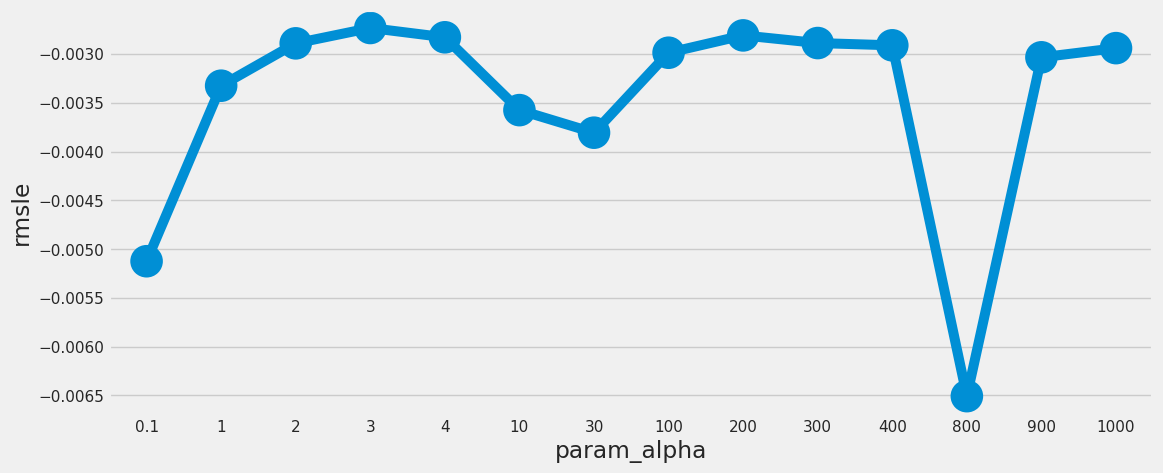

In [ ]:
%%time
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

Regularization Model - Lasso

{'alpha': 0.0033333333333333335, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.977940093509725


<Axes: xlabel='param_alpha', ylabel='rmsle'>

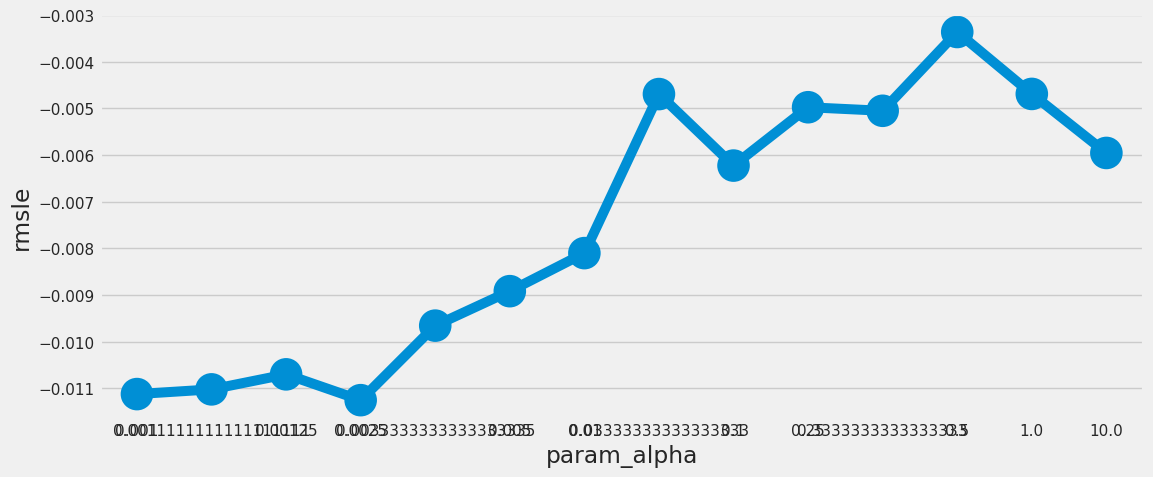

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

## Logistic Regression


## Logistic function

$g(x) = {\dfrac {e^x}{1+e^x}}$

다른 말로 시그모이드(Sigmoid)함수라고 함. 그 모양이 S자와 유사한 성질이 있음.

독립변수의 선형결학을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법.

앞에서 선형회귀에서 우리는 1차 선형함수를 배웠다.

$y = Wx+b$

$y = W_1X_1+W_2X_2 +\cdots + W_nX_n +b$

오즈비

${\dfrac{p}{1-p}}$

$ln{\dfrac{p}{1-p}} = WX$

${\dfrac{p}{1-p}} = e^{WX}$

양변에 역수를 취하면,

${\dfrac{1-p}{p}} = {\dfrac{1}{p}}-1 = {\dfrac{1}{e^{WX}}}$

${\dfrac{1}{p}} = {\dfrac{1}{e^{WX}}} +1 = {\dfrac
{1}{e^{WX}}}+{\dfrac{e^{WX}}{e^{WX}}} = {\dfrac{1+e^{WX}}{e^{WX}}}$

다시 한번 역수를 취하면

$p = {\dfrac {e^{WX}}{1+e^{{WX}}}}$

우리가 아는 식으로 변형하면

$p = {\dfrac{e^{WX}}{1+e^{WX}}} \cdot {\dfrac{{\dfrac {1}{e^{WX}}}}{{\dfrac{1}{e^{WX}}}}} = {\dfrac{1}{\dfrac{1}{e^{WX}}+1}} = {\dfrac {1}{e^{-WX}}}$ 

위스콘신 유방암 예측

- 총 309개의 속성과 malignant(악성), benign(양성)의 타겟값을 가지고 있다

**데이터셋 조회**

빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.

key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

공통 key는 다음과 같습니다.

- data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- target: Label 데이터, Numpy 배열로 이루어져 있습니다.
- feature_names: Feature 데이터의 이름
- target_names: Label 데이터의 이름
- DESCR: 데이터 셋의 설명
- filename: 데이터 셋의 파일 저장 위치 (csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
type(cancer)

sklearn.utils.Bunch

In [ ]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
np.bincount(cancer.target) # 빈도수

array([212, 357])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
for i,name in enumerate(cancer.feature_names): # 이름에 따라서 순번을 달아놓음.
  print('%02d : %s' %(i,name))

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [ ]:
print('data =>',cancer.data.shape)
print('target=>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>', malignant.shape)
print('benign(악성) =>', benign.shape)

data => (569, 30)
target=> (569,)
malignant(악성) => (212, 30)
benign(악성) => (357, 30)


In [ ]:
len(cancer.feature_names)

30

In [ ]:
len(cancer.data)

569

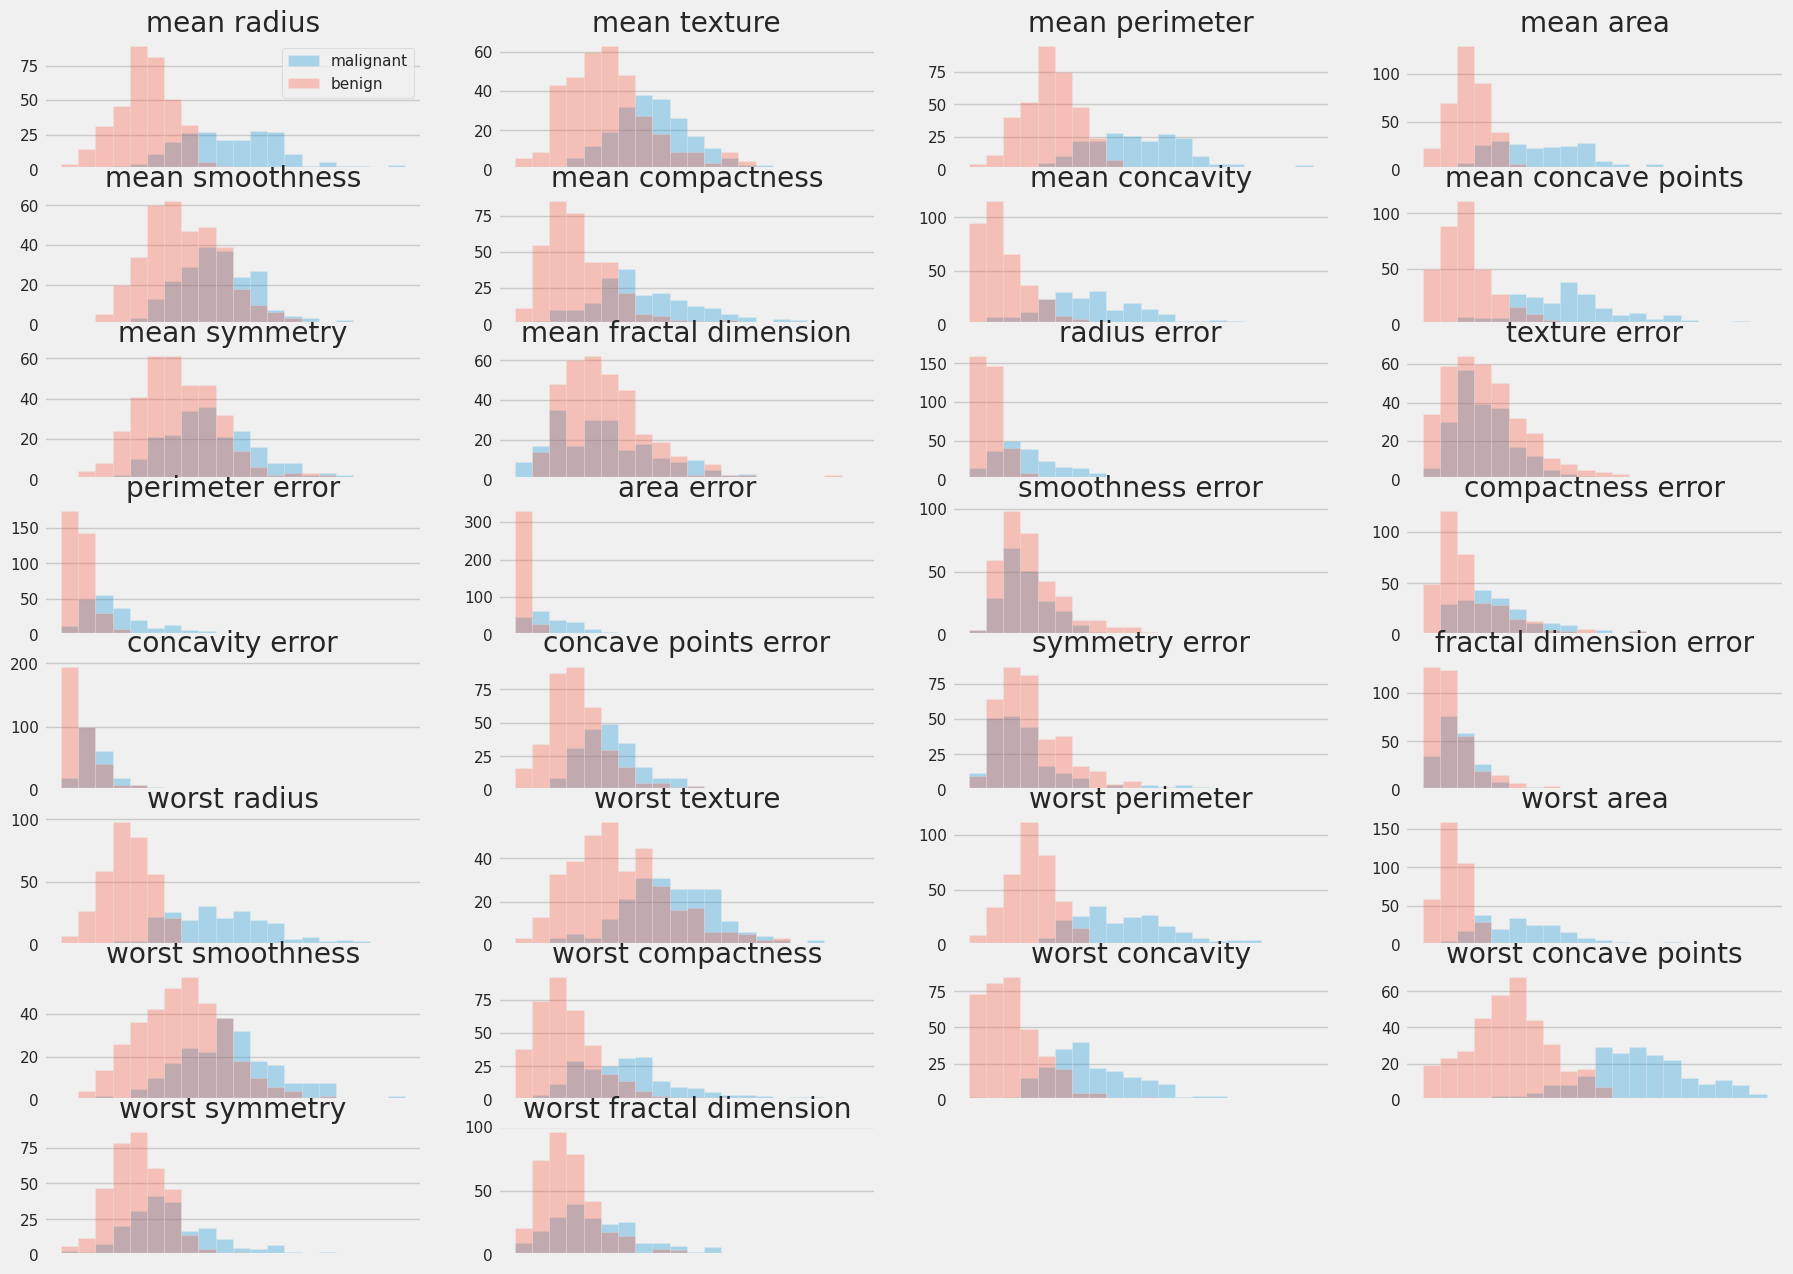

In [ ]:
plt.figure(figsize=[20,15])

for col in range(len(cancer.feature_names)):
  plt.subplot(8,4,col+1)
  _,bins = np.histogram(cancer.data[:,col],bins=20)

  plt.hist(malignant[:,col], bins=bins,alpha=0.3)
  plt.hist(benign[:,col], bins=bins,alpha=0.3)
  plt.title(cancer.feature_names[col])
  if col==0:plt.legend(cancer.target_names)
  plt.xticks([])

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
  X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                   test_size=0.2,
                                                   random_state = 777)

  model = LogisticRegression(max_iter = 5000)
  model.fit(X_train,y_train)

  score = model.score(X_test,y_test)
  scores.append(score)

print('scores = ', scores)

scores =  [0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]


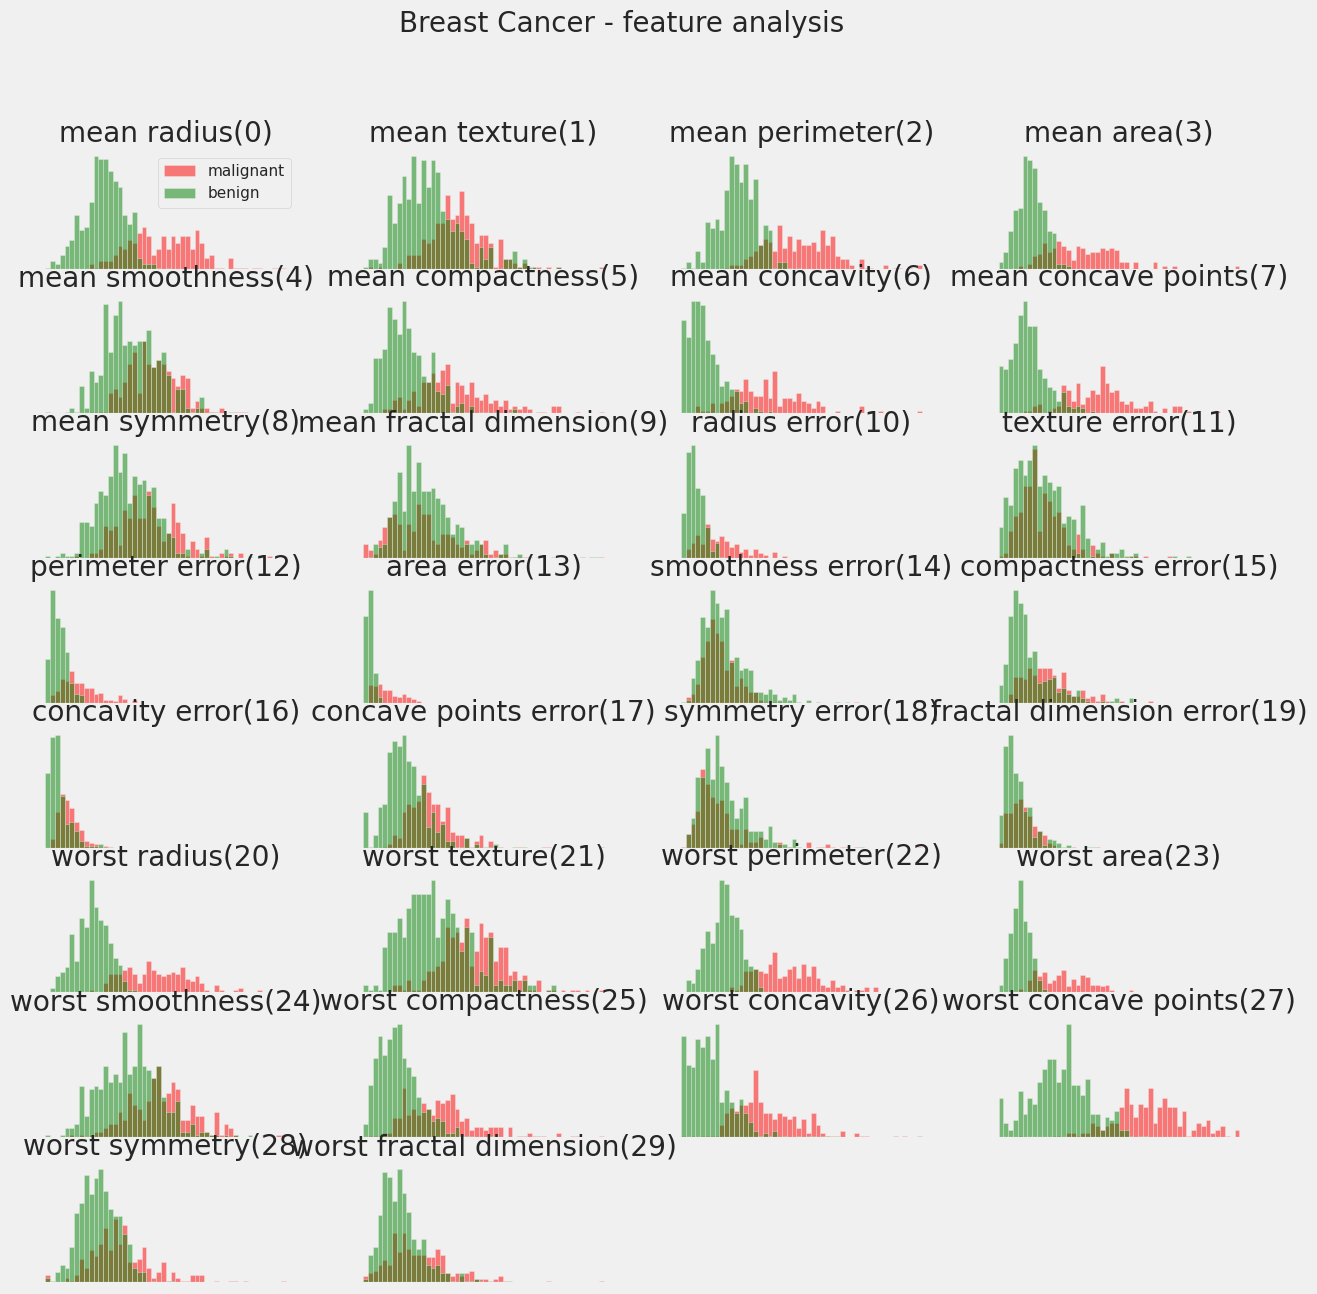

In [ ]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()
    

# 앞에서 했던 타이타닉에도 로지스틱이 더 좋은 결과가 나옴


# 로지스틱 회귀 실습 3
- 독버섯 분류하기(https://www.kaggle.com/uciml/mushroom-classification)
- 목적 : 독버섯(poisonous)인지 식용버섯(edible)인지 분류하는 것.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mushroom = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")
mushroom

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
#라벨인코딩이라는 것은 이름으로 되어있는 것을 숫자로 혹은 그 반대로 변환하는 것입니다.
LabelEncoder = LabelEncoder()
for col in mushroom.columns:
  mushroom[col] = LabelEncoder.fit_transform(mushroom[col]) # column 별로 labelEncoder를 적용.

mushroom

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

[Text(0.5, 1.0, 'Unique elements per column'),
 Text(0, 0.5, 'No of unique elements'),
 Text(0.5, 0, 'Features')]

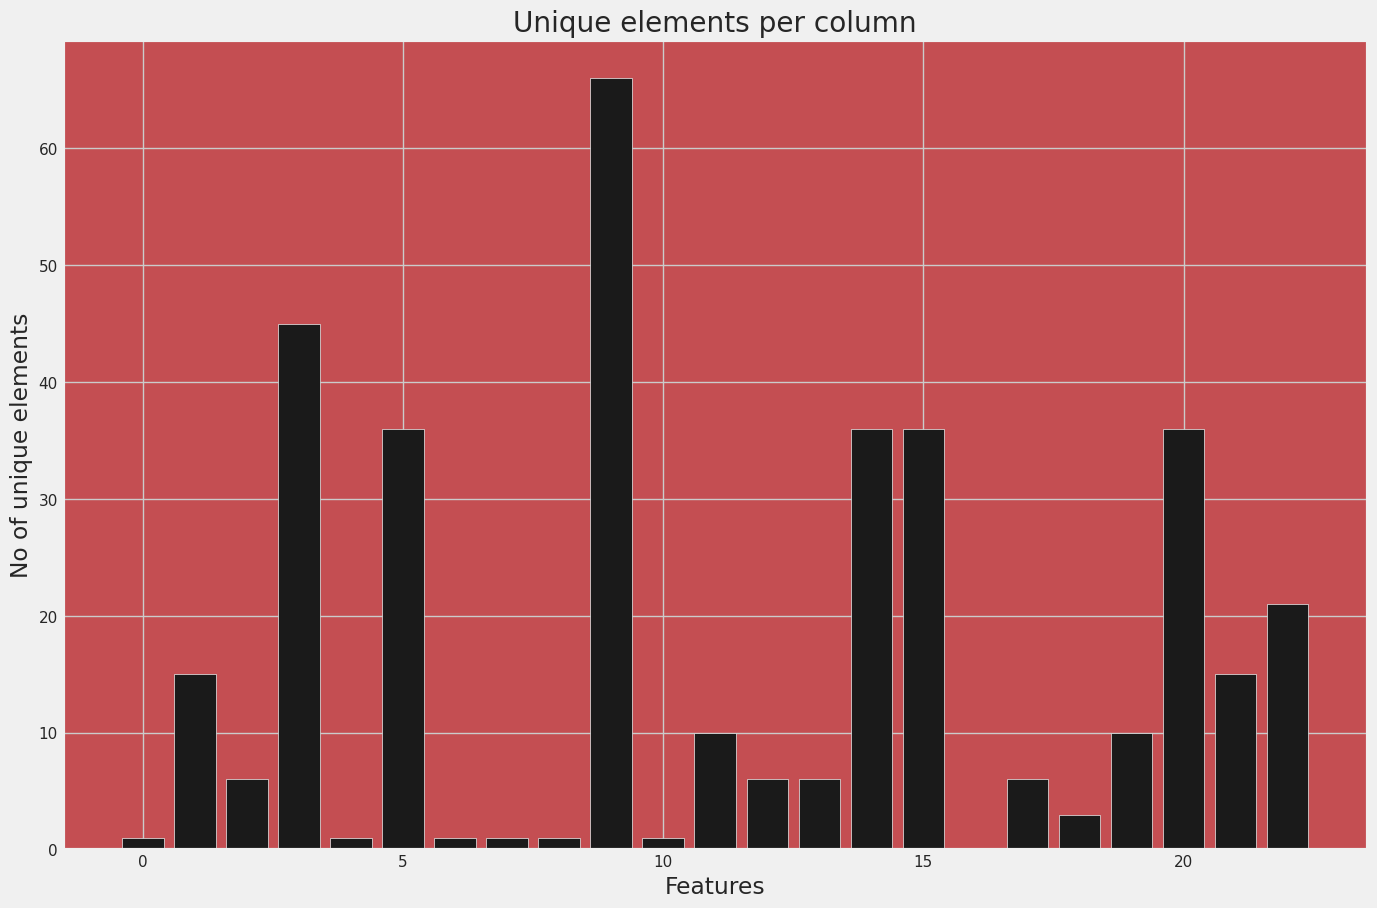

In [ ]:
count_var = []

for col in mushroom.columns:
  count_var.append(mushroom[col].unique().sum()) #Series 접근 -> column으로 접근하니깐, Series와 똑같음
  #dataframe duplicated, duplicates -> 중복제거.
size = np.arange(len(count_var))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,facecolor='r')
ax.bar(size, count_var,color='k')
ax.set(title='Unique elements per column',
       ylabel = 'No of unique elements',
       xlabel = 'Features')

<Axes: >

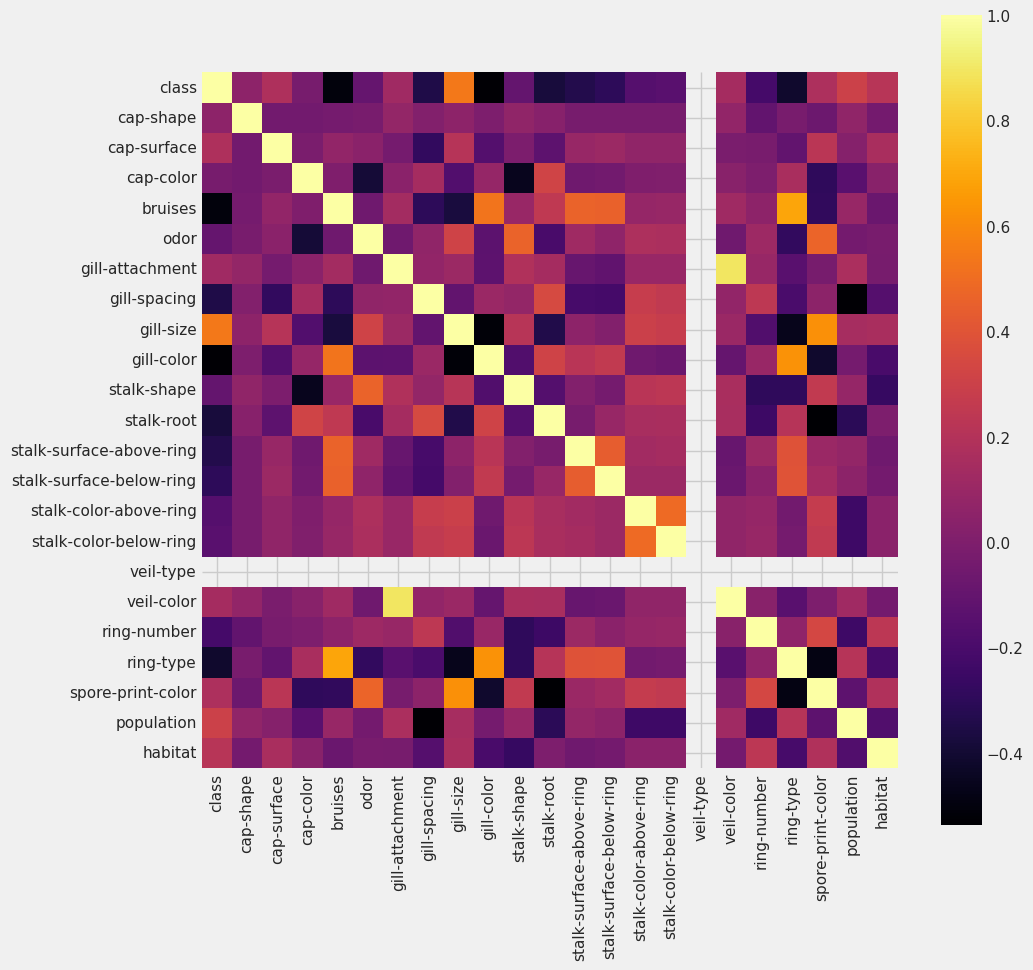

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(mushroom.corr(), cmap='inferno', square=True)

In [ ]:
target = mushroom['class']
train = mushroom.drop('class',axis=1)

Text(0.5, 1.0, 'Class distribution')

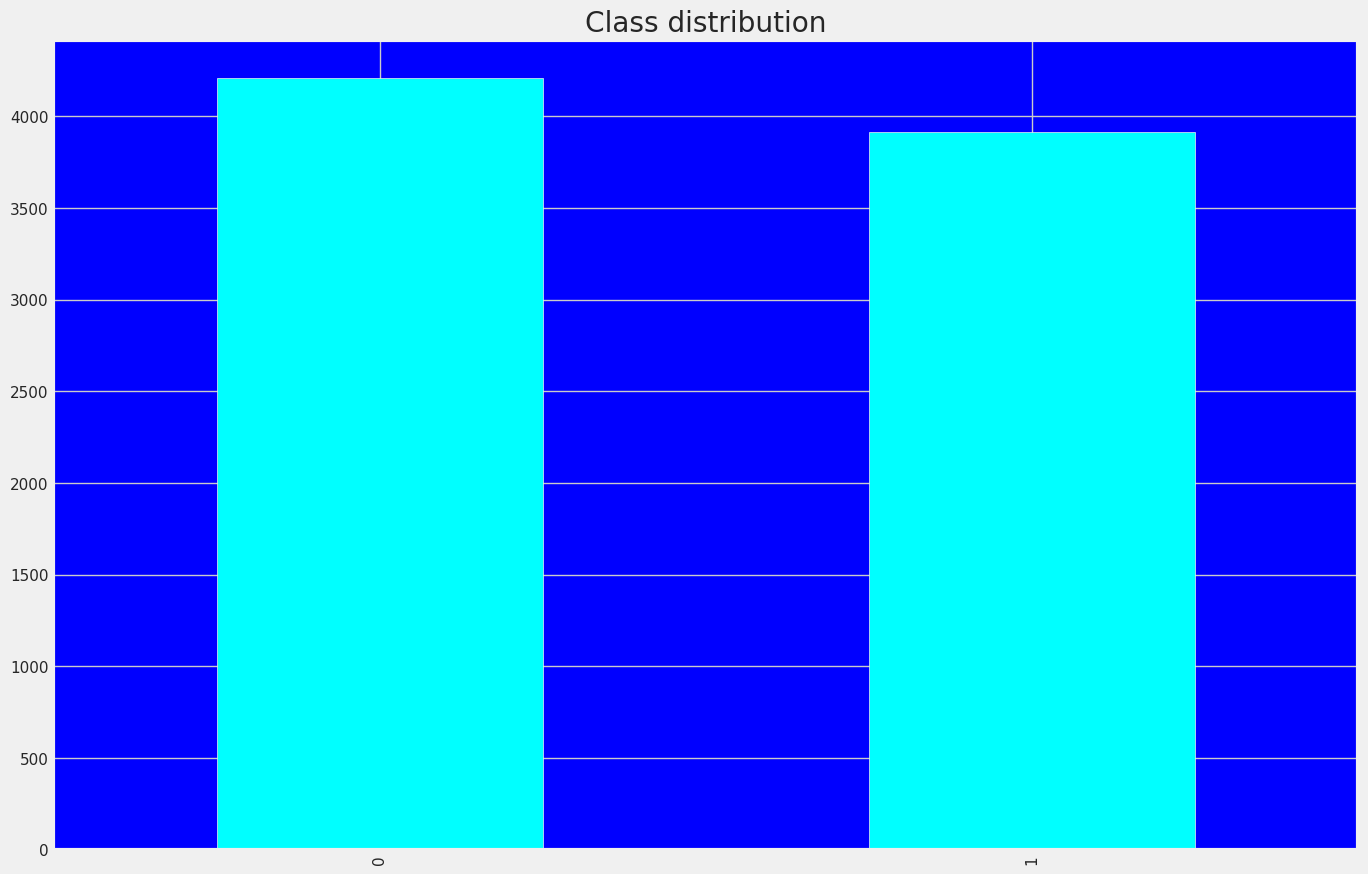

In [ ]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1,facecolor='blue')
pd.value_counts(target).plot(kind='bar', cmap = 'cool')
plt.title("Class distribution")

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.9518709995076317

# 230512
- 와인 데이터 품질 분류 하기.

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

X = wine['data']
feature_names = wine['feature_names']

y = wine['target']

df = pd.DataFrame(X, columns = feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

- 가져온 데이터를 살펴보자

In [ ]:
print(wine['target_names'])
print(y)
print(y.shape)

['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


- 그래프를 이용해 직관적으로 알아보자

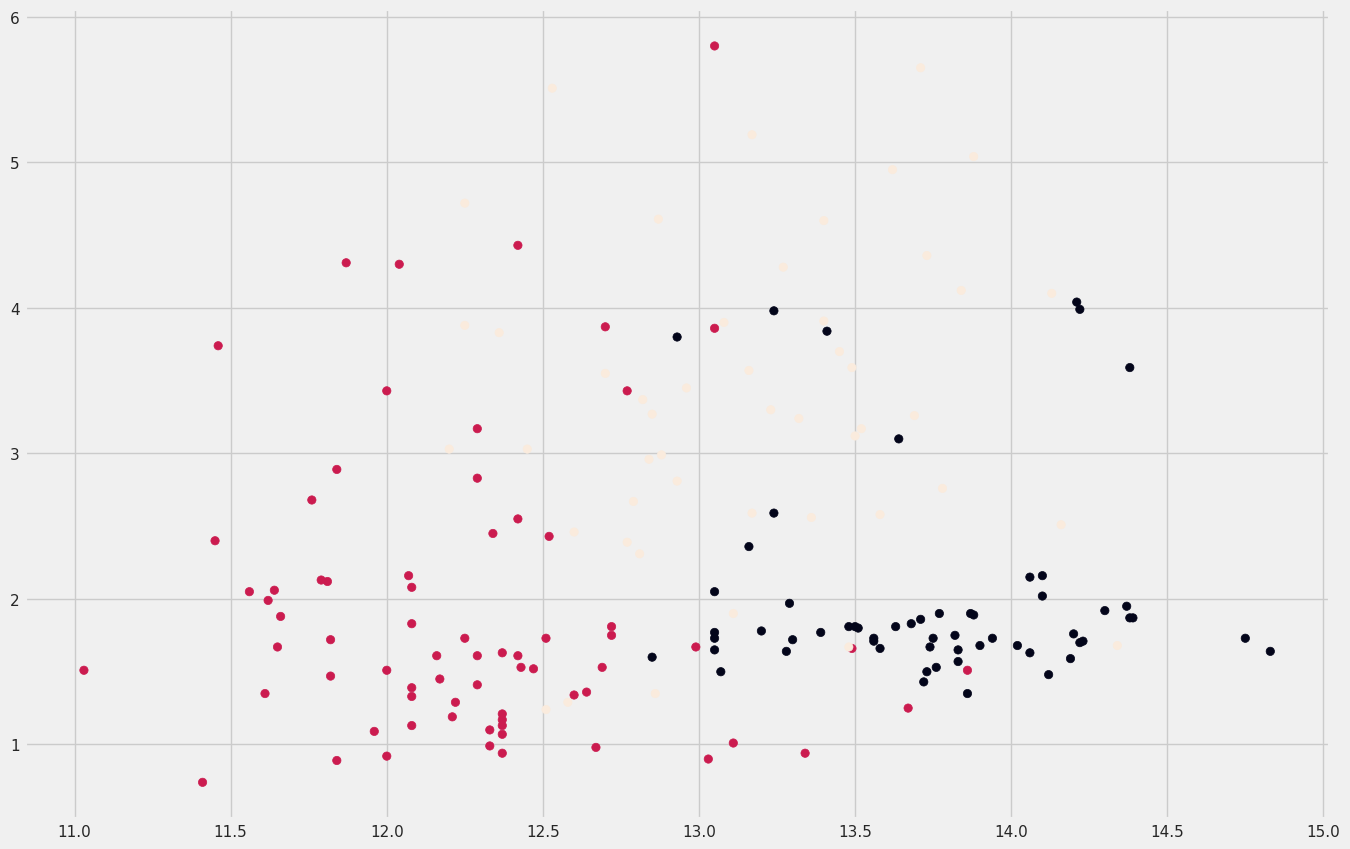

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(df['alcohol'],df['malic_acid'],c=y)

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <Axes: xlabel='magnesium', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>,
        <Axes: xlabel='flavanoids', ylabel='alcohol'>,
        <Axes: xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <Axes: xlabel='proanthocyanins', ylabel='alcohol'>,
        <Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='hue', ylabel='alcohol'>,
        <Axes: xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <Axes: xlabel='proline', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>,
        <Axes: xlabel='ash', ylabel='malic_acid'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='malic_acid'>,
        <Axes: xlabel='magne

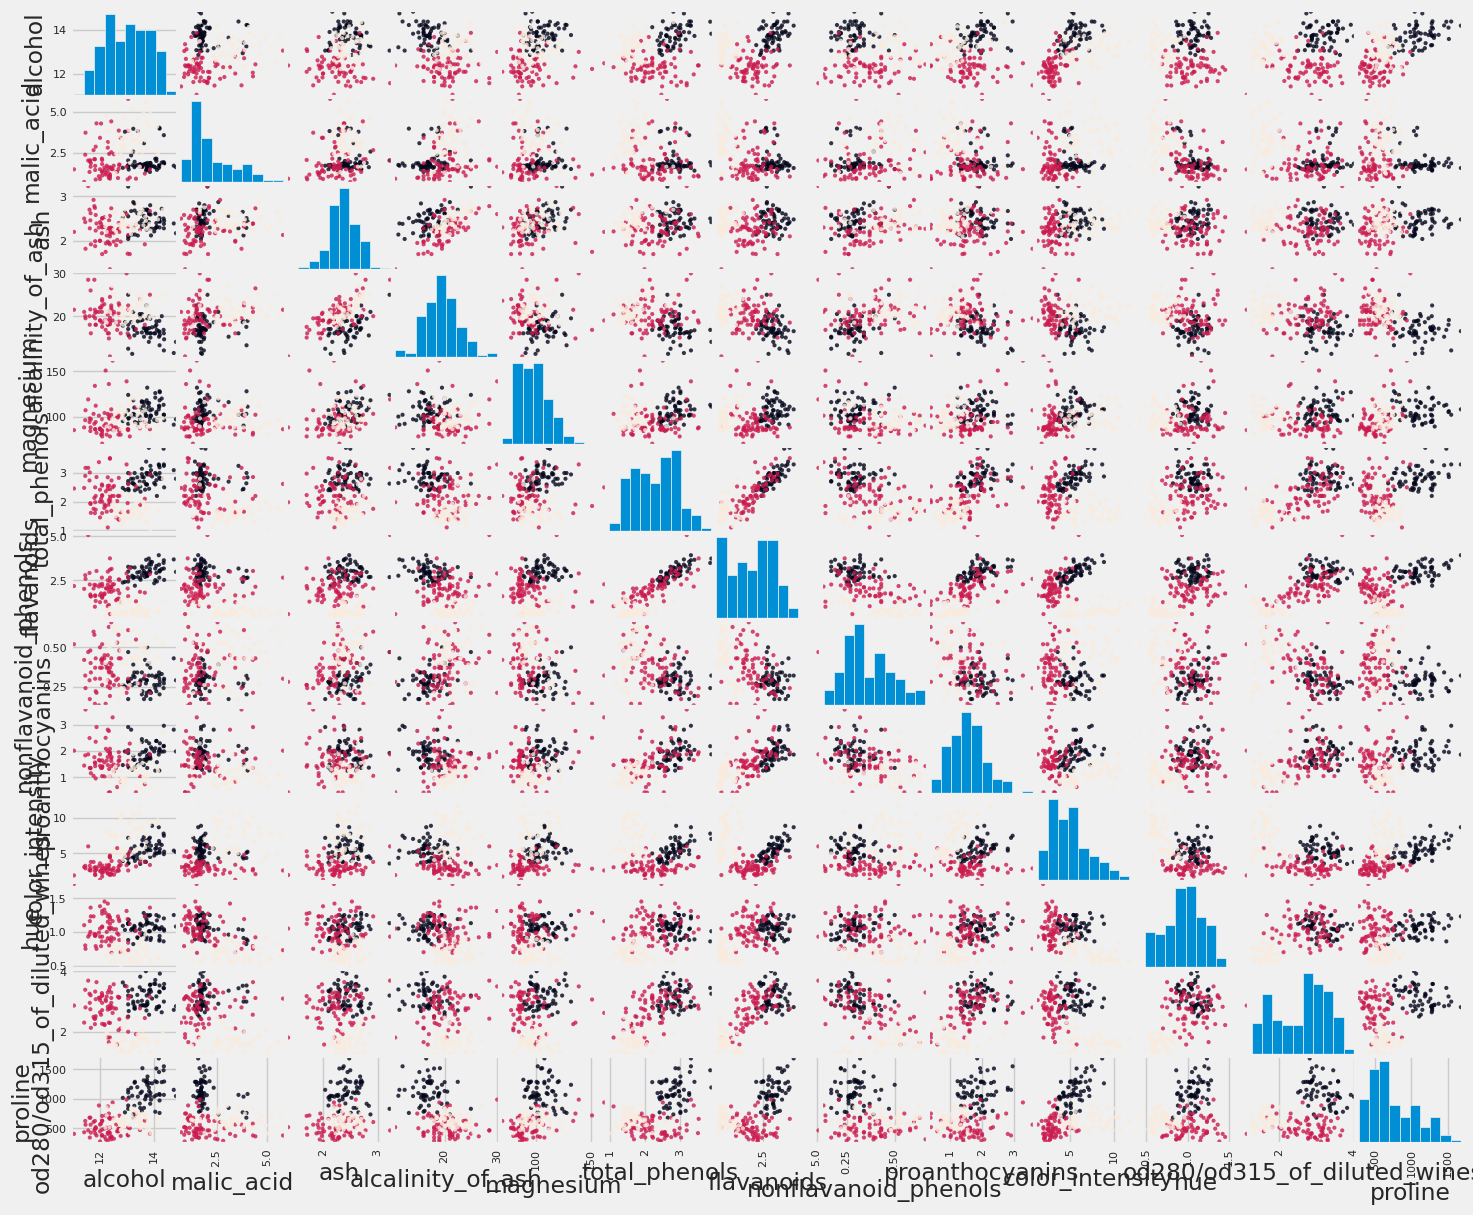

In [ ]:
pd.plotting.scatter_matrix(df,c=y,figsize=(16,14),alpha=0.8)
#sns,pairplot으로도 그릴수 있음.

- Train_test_Split

- staratify : target 데이터(Y)의 분포 비율을 고려해서 적절히 train, test set 데이터를 만듭니다. 분류모델에서만 사용하는 것을 추천합니다.
- random_state : '777'이라는 고정된 랜덤시드를 사용합니다. 데이터셋을 나눌 때마다 데이터셋이 서로 다르게 만들어지는 것을 막습니다. 모델학습, 실험을 여러번 진행할 때, 데이터셋으로 인한 랜덤요소를 제거하고 각 모델 간 성능을 비교할 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=777)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(133, 13) (45, 13)
(133,) (45,)


- X의 컬럼별 기술 통계량(평군,25%,75% 분위수,count etc)

In [ ]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

- 평균이 너무 다름. -> 변수들끼리 비교 대상이 될 수 없음

nonflavanoid_phenols의 평균은 0.3인데 proline의 평균은 746입니다.
칼럼마다 scale이 매우 다르다는 것인데, 이 경우 Y를 분류하는데에 미치는 영향 정도가 달라지게 됩니다.
보다 원활한 학습의 진행을 위해서는 정규화를 진행할 필요가 있습니다.
분야에 따라 서로 각기다른 정규화를 사용하기도 하고, 새로운 방식을 만들어내기도 합니다.

sklearn.preprocessing에서 제공하는 대표적인 정규화 scaler는 다음과 같습니다.

- StandardScaler : (평균=0, 분산=1)이 되도록 조정합니다.
- MinMaxScaler : 모든 값이 0~1 사이에 오도록(최대값=1, 최소값=0) 조정합니다.
- RobustScaler : 최대, 최솟값 대신 사분위값(Q1, Q2, Q3)를 사용해 조정합니다. (이상값에 덜 민감함)

여기서는 MinMaxScaler를 사용하겠습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
#X_scaled_train = scaler.fit_transform(X_train)와 차이가 없음.

pd.DataFrame(X_scaled_train).describe()

0           1           2           3           4           5   \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     0.512268    0.301847    0.568601    0.445129    0.329683    0.446098   
std      0.206279    0.238522    0.214119    0.170097    0.164545    0.213477   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.342105    0.134904    0.435897    0.335106    0.195652    0.262069   
50%      0.531579    0.190578    0.564103    0.420213    0.304348    0.431034   
75%      0.684211    0.468951    0.735043    0.547872    0.434783    0.627586   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     0.483915    0.464478    0.378762    0.319472    0.386491    0.486188   
std      0.285922    0.251911    0.179163    0.194846    0.190692    0.257047   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.219941    0.265306    0.274448    0.168089    0.243902    0.238095   
50%      0.519062    0.408163    0.362776    0.283276    0.398374    0.553114   
75%      0.744868    0.632653    0.485804    0.424061    0.512195    0.695971   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12  
count  133.000000  
mean     0.378229  
std      0.248423  
min      0.000000  
25%      0.173061  
50%      0.318367  
75%      0.567347  
max      1.000000

- X_train 데이터셋을 기준으로 scaler를 설정한 뒤, X_train 데이터를 정규화 한 데이터 X_scaled_train 데이터셋을 생성했습니다.
모든 칼럼에서 (max=1, min=0)이 되었습니다.

- X_train에 적용하였다면, X_test에도 적용을 해야함.

In [ ]:
X_scaled_test = scaler.transform(X_test)
pd.DataFrame(X_scaled_test).describe()

0          1          2          3          4          5   \
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
mean    0.537251   0.256721   0.572840   0.429669   0.304348   0.475326   
std     0.235528   0.240762   0.289175   0.199885   0.123433   0.223575   
min     0.100000  -0.051392  -0.290598  -0.031915   0.086957   0.058621   
25%     0.352632   0.111349   0.435897   0.292553   0.206522   0.265517   
50%     0.531579   0.177730   0.564103   0.468085   0.282609   0.517241   
75%     0.736842   0.342612   0.700855   0.547872   0.380435   0.575862   
max     0.978947   1.032120   1.307692   0.920213   0.630435   0.868966   

              6          7          8          9          10         11  \
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
mean    0.529293   0.418141   0.354083   0.330906   0.393135   0.507041   
std     0.313578   0.259776   0.185411   0.208333   0.172606   0.271164   
min     0.046921  -0.020408   0.003155   0.057167   0.073171   0.007326   
25%     0.258065   0.244898   0.201893   0.164676   0.252033   0.285714   
50%     0.548387   0.346939   0.324921   0.291809   0.373984   0.553114   
75%     0.686217   0.591837   0.495268   0.402730   0.520325   0.706960   
max     1.390029   1.061224   0.804416   0.893345   0.731707   0.934066   

              12  
count  45.000000  
mean    0.357442  
std     0.283485  
min    -0.009796  
25%     0.142857  
50%     0.258776  
75%     0.567347  
max     1.134694

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_train,y_train)


pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train,y_train)

0.9849624060150376

In [ ]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

1.0

- 오차 행렬 확인

In [ ]:
from sklearn.metrics import confusion_matrix
print('훈련 데이터셋 오차 행렬\n', confusion_matrix(y_train,pred_train),'\n')
print('테스트 데이터셋 오차 행렬\n', confusion_matrix(y_test,pred_test))

훈련 데이터셋 오차 행렬
 [[44  0  0]
 [ 1 51  1]
 [ 0  0 36]] 

테스트 데이터셋 오차 행렬
 [[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


- 성능결과 확인.
  - precision(정밀도), F1-score, sklearn -> classification_report를 사용하면 손쉽게 한번에 확인할 수 있음.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.96      0.98        53
           2       0.97      1.00      0.99        36

    accuracy                           0.98       133
   macro avg       0.98      0.99      0.99       133
weighted avg       0.99      0.98      0.98       133



#타이타닉 데이터

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style = 'white') # white backgrond style for seaborn plots
sns.set(style = 'whitegrid',color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Titanic_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Titanic_test.csv")

In [ ]:
print(len(train_df),len(test_df))

891 418


In [ ]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측치 비율
print('Percent of missing "Age" records is %.2f%%'%((train_df['Age'].isnull().sum()/
                                                     train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


- age에 대한 그림

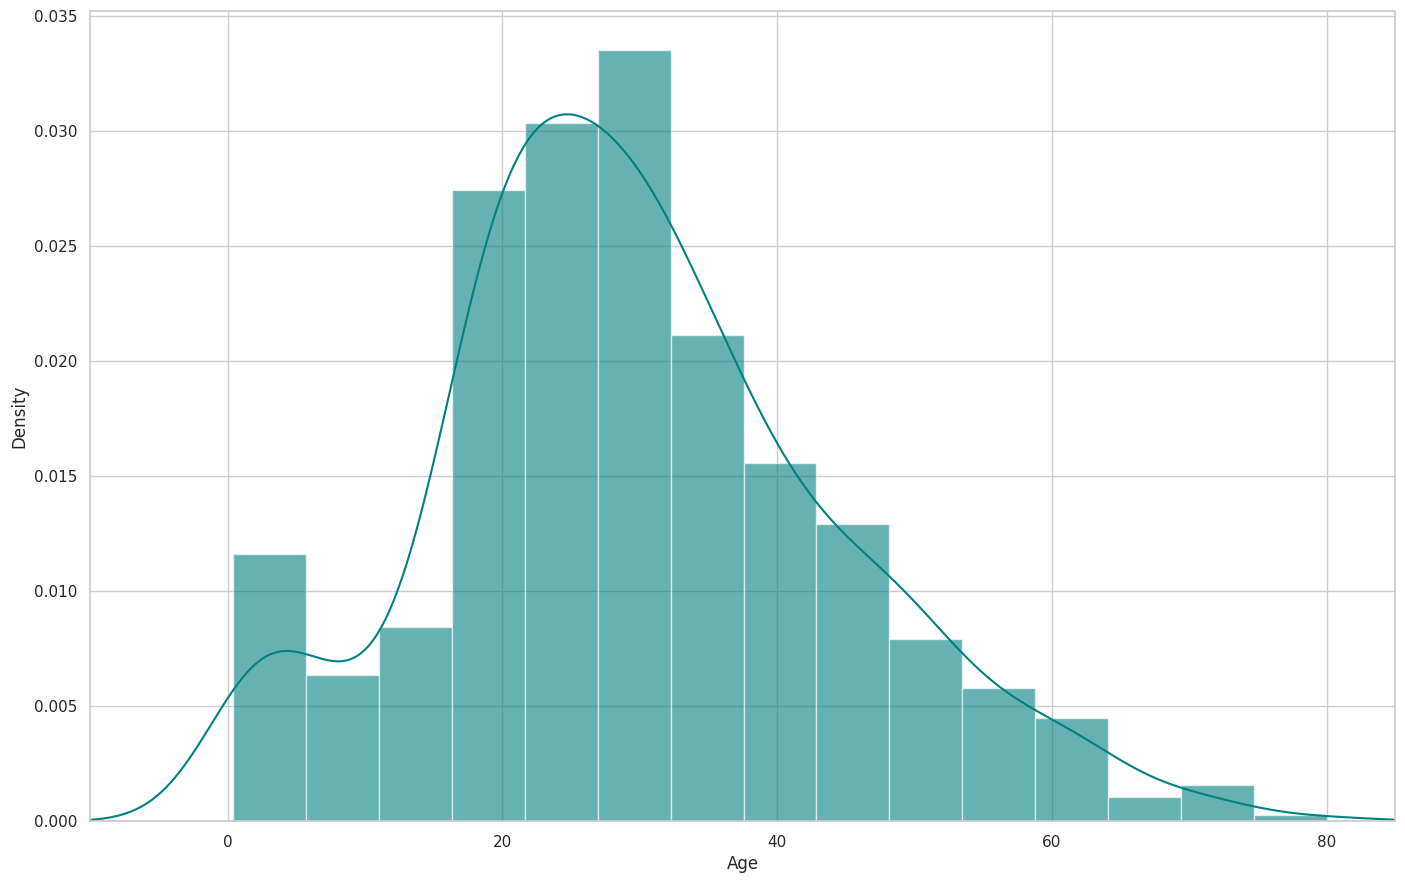

In [ ]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df['Age'].plot(kind= 'density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
#mean /#skipna : 결측치를 무시할지 여부
print('The mean of "Age" is %.2f' %(train_df['Age'].mean(skipna=True)))
#median
print('The median of "Age" is %.2f' %(train_df['Age'].median(skipna=True)))
#mode
print('The mode of "Age" is %.2f' %(train_df['Age'].mode()))

The mean of "Age" is 29.70
The median of "Age" is 28.00
The mode of "Age" is 24.00


In [ ]:
#결측치 비율(Embarked)
print('Percent of missing "Embarked" records is %.2f%%'%((train_df['Embarked'].isnull().sum()/
                                                     train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [ ]:
#결측치 비율(Cabin)
print('Percent of missing "Cabin" records is %.2f%%'%((train_df['Cabin'].isnull().sum()/
                                                     train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


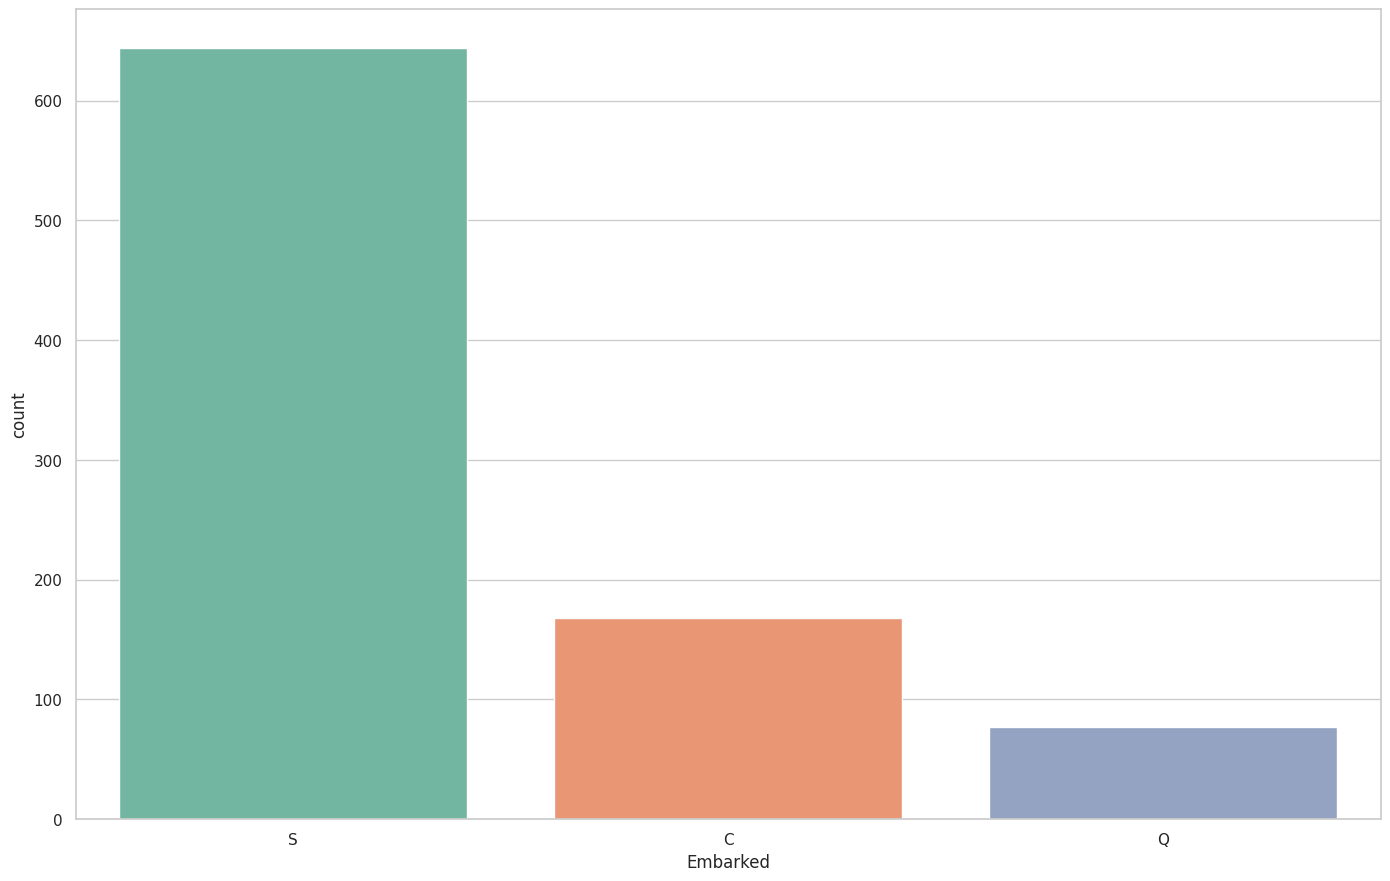

In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x= 'Embarked', data = train_df, palette='Set2')
plt.show()
#Embarked는 S에서 탑승이 많이 됨.

In [ ]:
#결측치 처리 / age는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
train_data = train_df.copy()
train_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1,inplace=True)

In [ ]:
#결측치 처리 후 확인
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

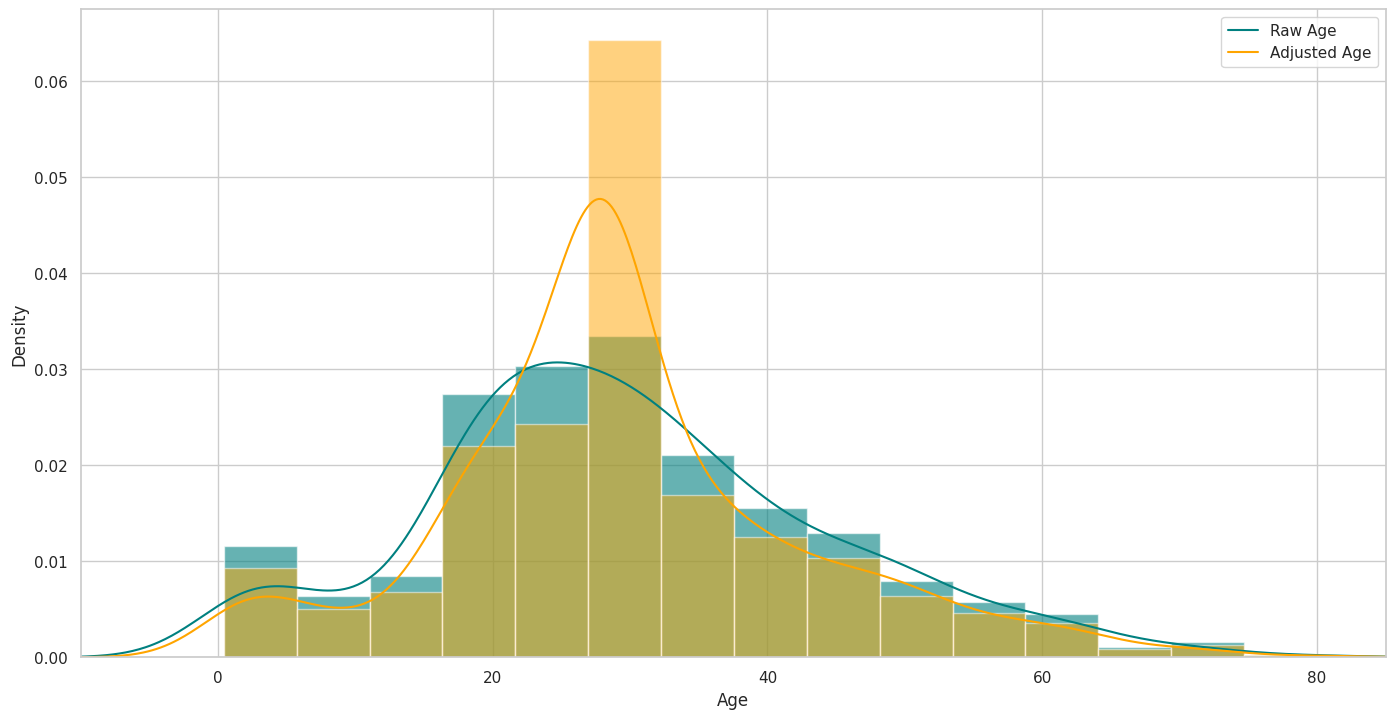

In [ ]:
#결측치 처리 전과 처리 후의 figure
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind = 'density', color='teal')
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind = 'density', color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

- 파생변수
  - 새로운 변수 생성

In [ ]:
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp', axis=1,inplace=True)
train_data.drop('Parch', axis=1,inplace=True)

In [ ]:
#원핫 인코딩
training = pd.get_dummies(train_data, columns = ['Pclass','Embarked','Sex'])
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training
training.head()

Survived   Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0   7.2500            0         0         0         1   
1         1  38.0  71.2833            0         1         0         0   
2         1  26.0   7.9250            1         0         0         1   
3         1  35.0  53.1000            0         1         0         0   
4         0  35.0   8.0500            1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  
0           0           0           1           0         1  
1           1           0           0           1         0  
2           0           0           1           1         0  
3           0           0           1           1         0  
4           0           0           1           0         1

- test에도 똑같이 적용

In [ ]:
#결측치 처리 / ags는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
test_data = test_df.copy() 
test_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
test_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

#원핫 인코딩
testing = pd.get_dummies(test_data, columns = ['Pclass','Embarked','Sex'])
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_test = testing
testing.head()

Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0  34.5   7.8292            1         0         0         1           0   
1  47.0   7.0000            0         0         0         1           0   
2  62.0   9.6875            1         0         1         0           0   
3  27.0   8.6625            1         0         0         1           0   
4  22.0  12.2875            0         0         0         1           0   

   Embarked_Q  Embarked_S  Sex_female  Sex_male  
0           1           0           0         1  
1           0           1           1         0  
2           1           0           0         1  
3           0           1           0         1  
4           0           1           1         0

- Exploratory Data Analysis

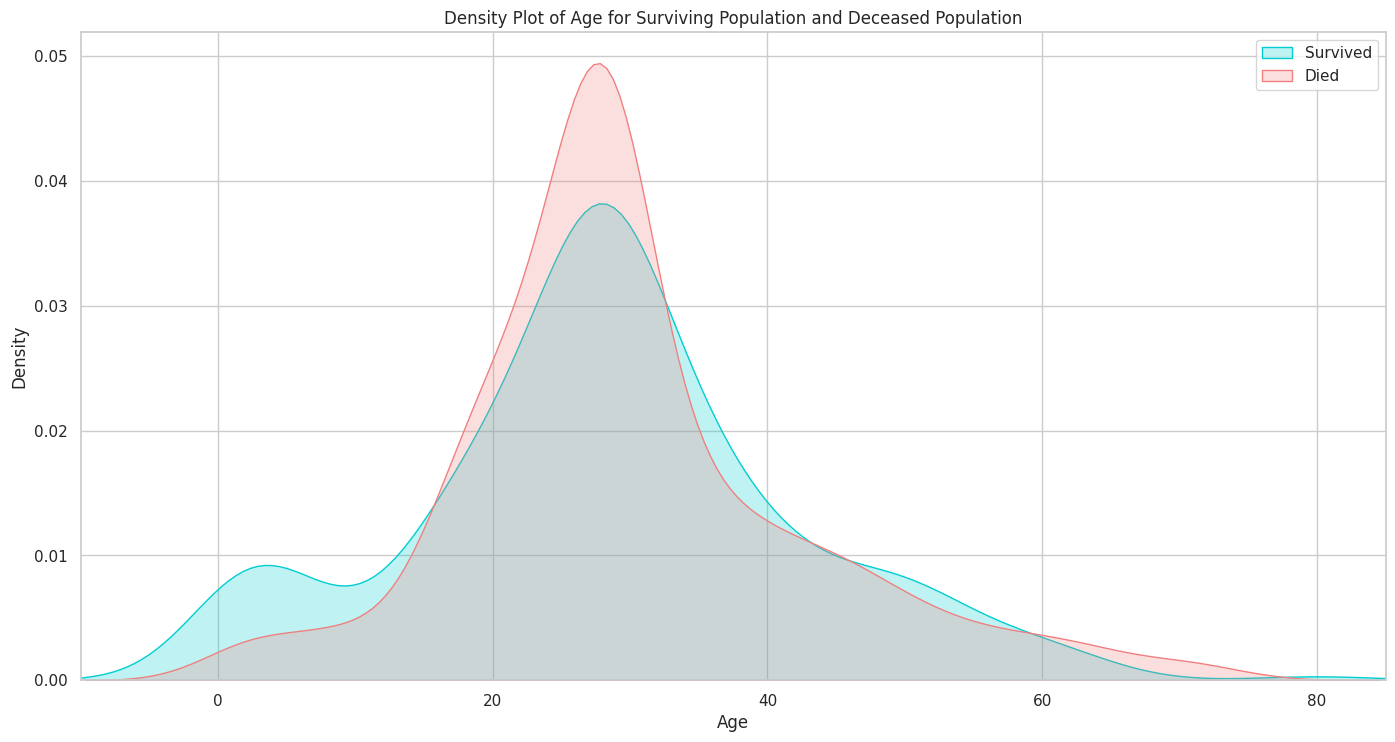

In [ ]:
#Exploration of Age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], 
            color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

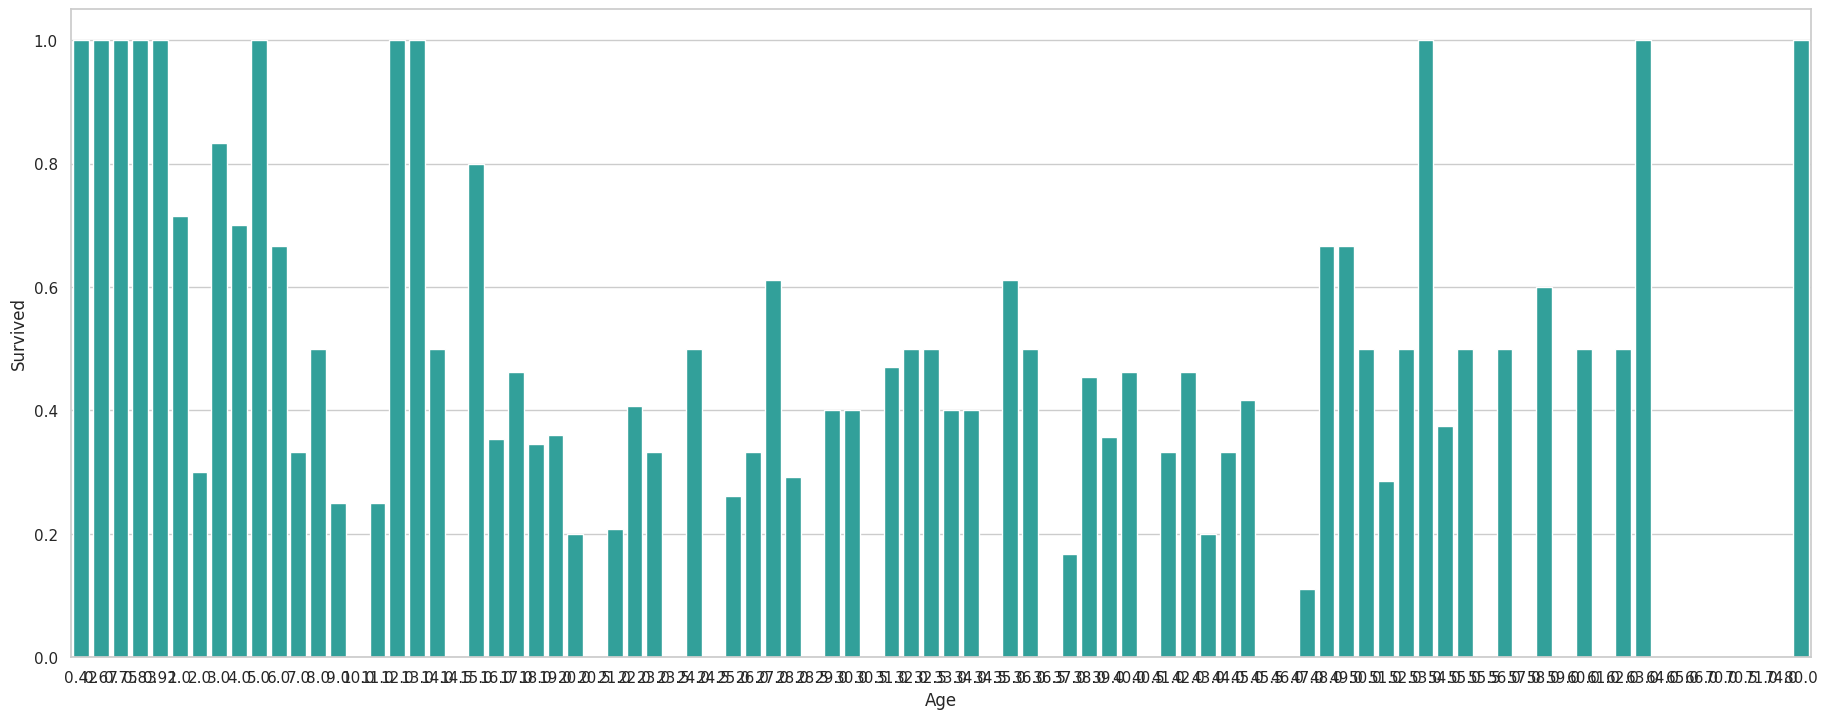

In [ ]:
#age,Survived -> bar plot
plt.figure(figsize = (20,8))
avg_survival_byage = final_train[['Age','Survived']].groupby(["Age"]
                                                             ,as_index=False).mean()
g = sns.barplot(x='Age',y='Survived',data =avg_survival_byage,
                color = 'LightSeaGreen')
plt.show()

In [ ]:
# ISminore
final_train['ISMinor'] = np.where(final_train['Age']<=16,1,0)
final_test['ISMinor'] = np.where(final_test['Age']<=16,1,0)

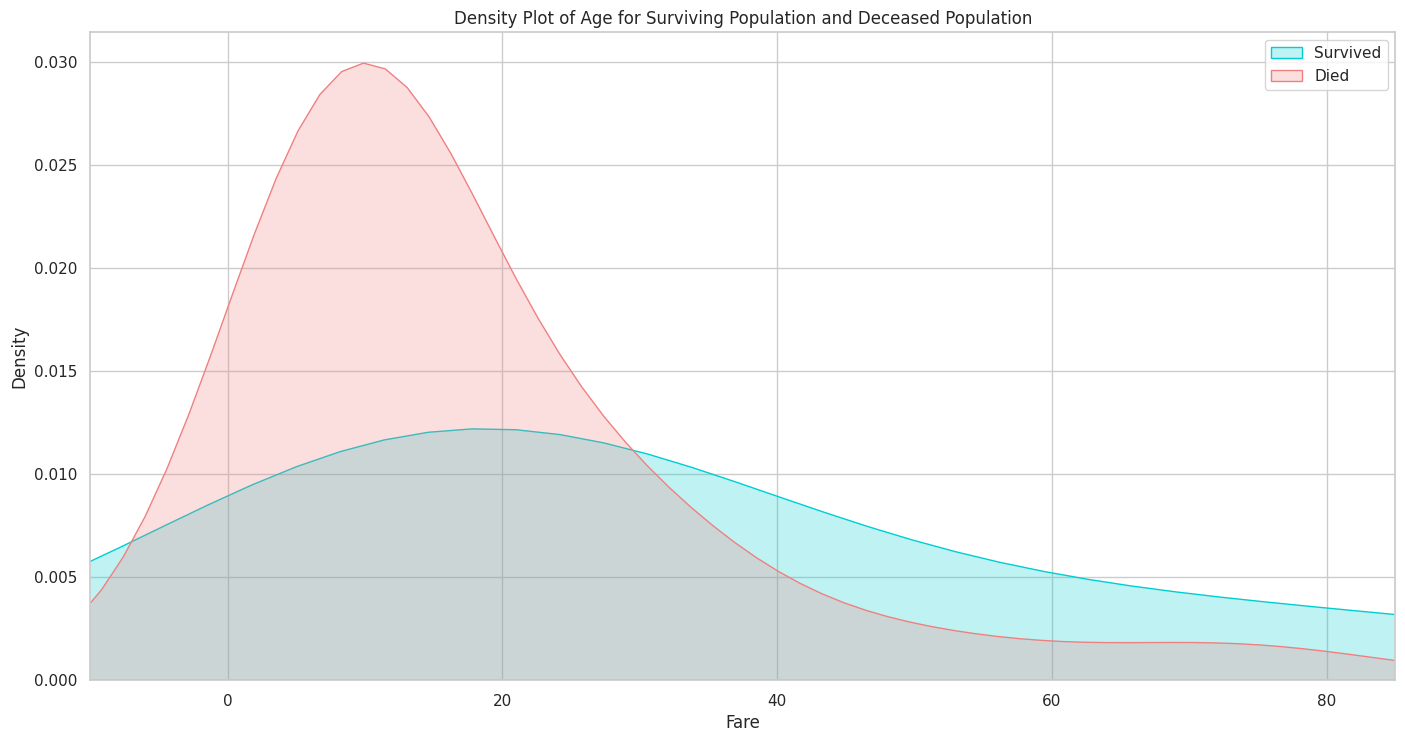

In [ ]:
#Exploration of Age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], 
            color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

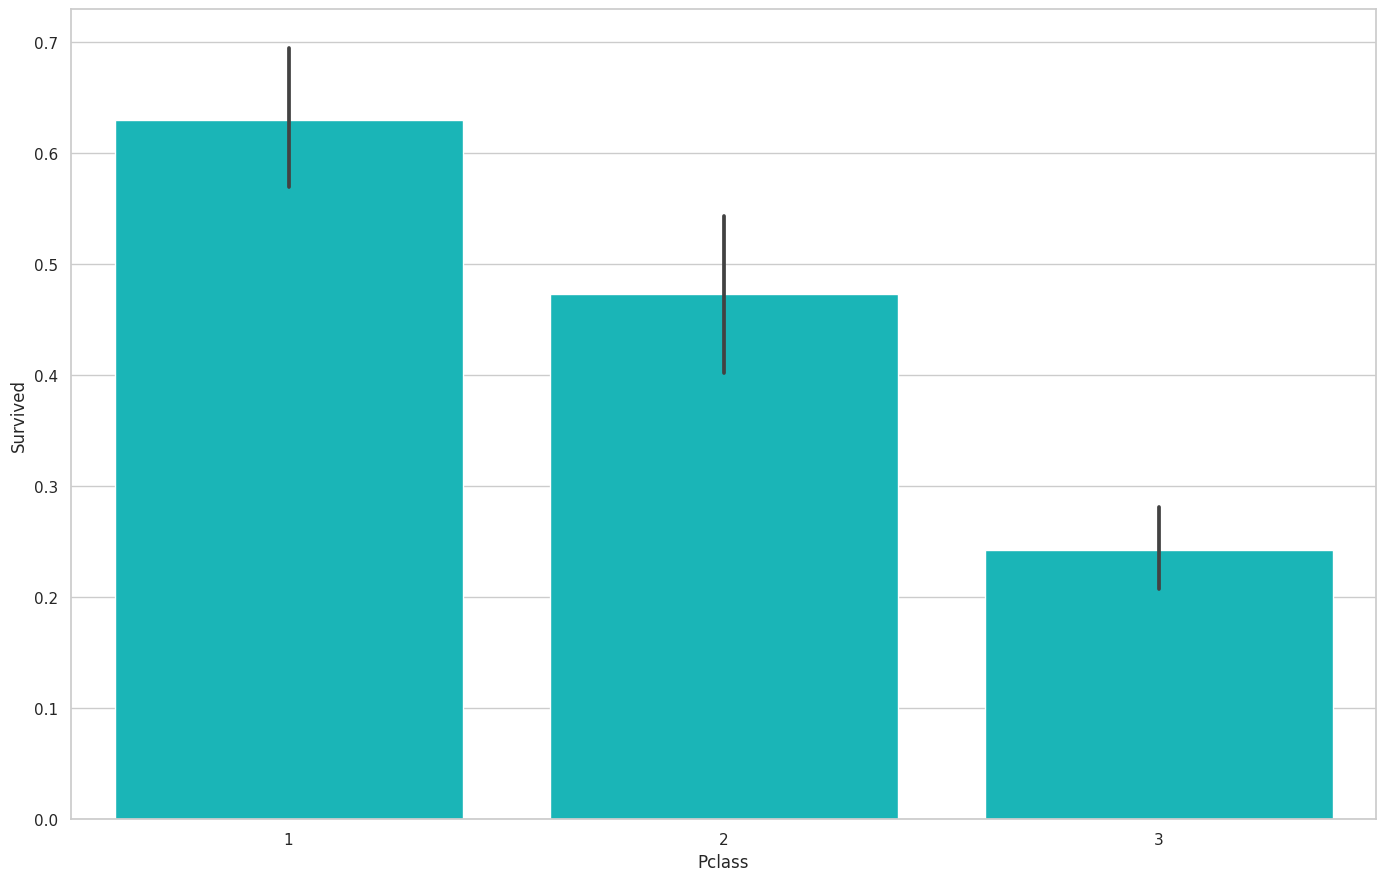

In [ ]:
#Exploration od Passenger Class
sns.barplot(data = train_df, x='Pclass', y='Survived', color='darkturquoise')
plt.show()
#1등급 승객이 안전하였음.

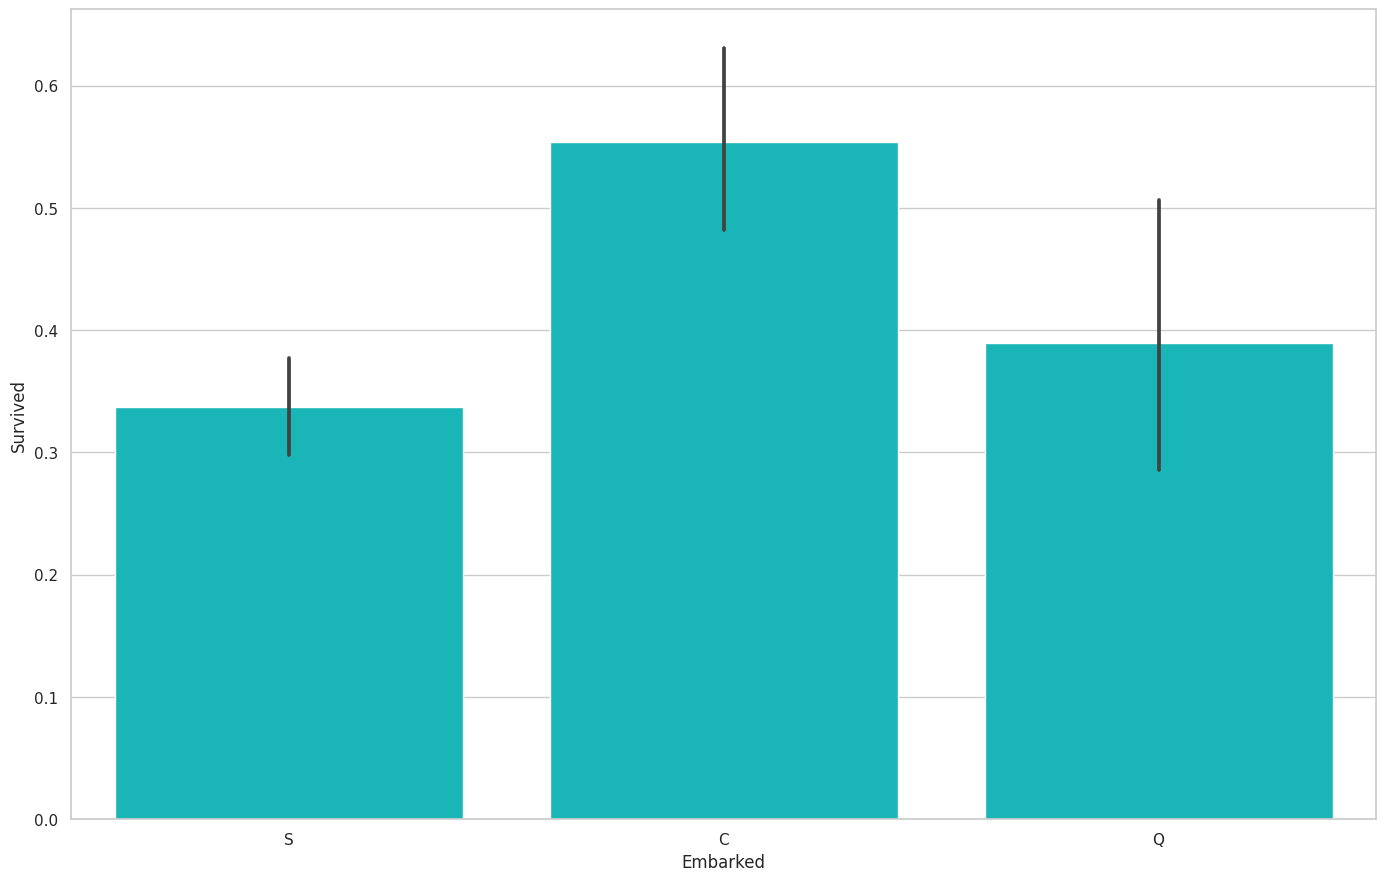

In [ ]:
#Exploration od Embarked Port
sns.barplot(data = train_df, x='Embarked', y='Survived', color='darkturquoise')
plt.show()
# C위치에서 탑승을 제일 많이 함.

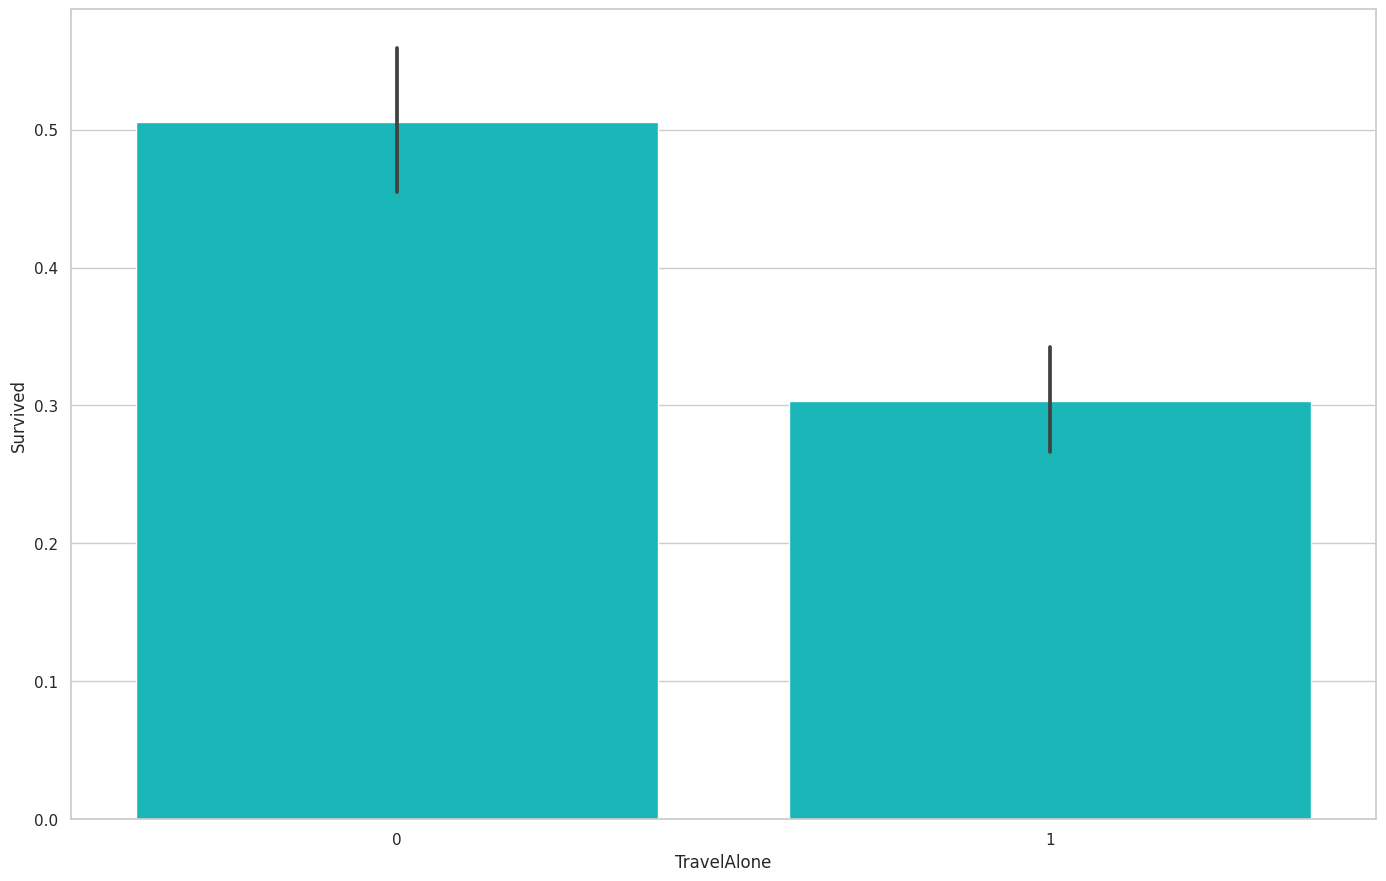

In [ ]:
#Exploration od Traveling Alone VS With Family
sns.barplot(data = final_train, x='TravelAlone', y='Survived', color='darkturquoise')
plt.show()
#혼자이면 사망을 많이 함.

- Logistic Regression()

- Feature Selection

- Recusive feture elmination(RFE)
  - 뒤에서부터 상관관계가 높지 않으면 feature 삭제

출처 : http://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age','Fare','TravelAlone','Pclass_1','Pclass_2',
       'Embarked_C','Embarked_S','ISMinor']
X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression()

rfe = RFE(model,n_features_to_select=5) #feature Ranking
rfe = rfe.fit(X,y)
print('Selected features: %s' %list(X.columns[rfe.support_]))

Selected features: ['TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'ISMinor']


Optimal number of features: 7
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'ISMinor']


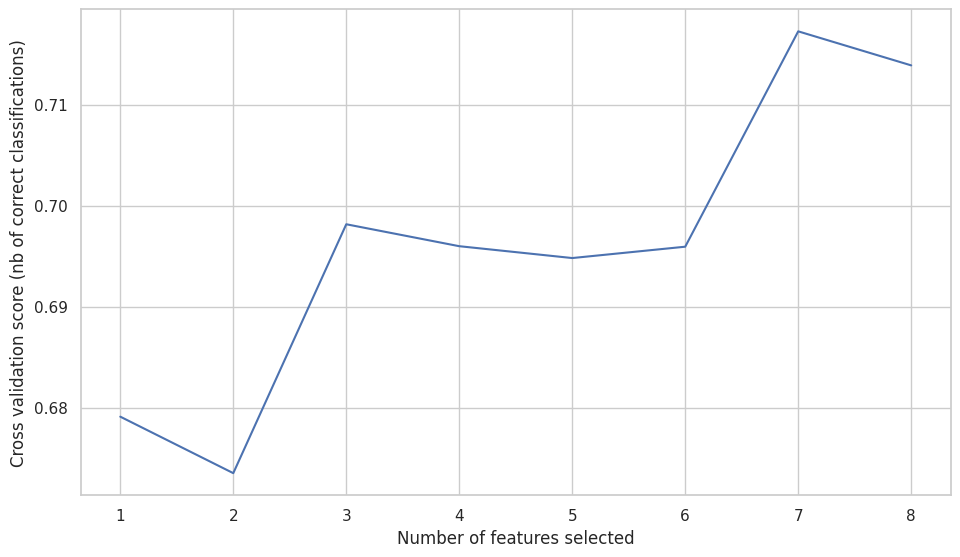

In [ ]:
# RFE+CV
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()